# Programa principal

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import networkx as nx
import math
import plotly.graph_objs as go
from plotly.io import write_image
from plotly.subplots import make_subplots
import scipy.sparse
import scipy.sparse.linalg
import random
import plotly.io as pio

## Functions

In [2]:
#calculate of the statacionary state
"""
n = mi0.shape[0]  # Number of states
A = np.transpose(mi0) - np.identity(n)
A[-1, :] = 1  # Add the constraint that the sum of probabilities is 1
b = np.zeros(n)
b[-1] = 1
stationary_vector = solve(A, b)
"""
"""#find the W-matrix 
identi=np.eye(236,236)
W=np.tile(mie0, (236, 1))
#find Z-matrix
z=identi-mi0+W
Z=np.linalg.inv(z)"""
"""provitional=np.zeros((236,236))
for i in range(zi0.shape[0]):
    for j in range(zi0.shape[1]):
        zij=Z[i,j]
        zjj=Z[j,j]
        wj=mie0[j]
        t=(zjj-zij)/wj
        provitional[i,j]=t

firstsum=np.sum(provitional)
firstsum/(2*math.comb(236,2))"""

"""def stationary_vector(matrix):
    n = matrix.shape[0]  # Number of states
    A = np.transpose(matrix) - np.identity(n)
    A[-1, :] = 1  # Add the constraint that the sum of probabilities is 1
    b = np.zeros(n)
    b[-1] = 1
    stationary_vector = solve(A, b)
    return stationary_vector"""
"""SECOND= define a srwecuaction"""
def srw(q,mc,ms):
    return q*ms + (1-q)*mc

def stationary_vector(p):
    dim = p.shape[0]
    q = (p-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    bQT = np.ones(dim)
    return np.linalg.solve(QTQ,bQT)

def wmatrix(stationary_matrix):
    n=len(stationary_matrix)
    identity=np.eye(n,n)
    W=np.tile(stationary_matrix, (236, 1))
    return W

def zmatrix(wmatrix,matrix):
    n=len(matrix[0])
    identity=np.eye(n,n)
    z=identity-matrix+wmatrix
    Z=np.linalg.inv(z)
    return Z

def meanFirstPassageTime(zmatrix,stacionary_matrix):
    provitional=np.zeros((len(zmatrix),len(zmatrix)))
    for i in range(zmatrix.shape[0]):
        for j in range(zmatrix.shape[1]):
            zij=zmatrix[i,j]
            zjj=zmatrix[j,j]
            wj=stacionary_matrix[j]
            t=(zjj-zij)/wj
            provitional[i,j]=t
    firstsum=np.sum(provitional)
    firstsum=firstsum/(2*math.comb(236,2))
    return firstsum


## Networks

In [3]:
N_animal=pd.read_csv(r"C:\Users\gusta\OneDrive\Documentos\1. Proyecto fin de master\Programas Principal\Data\CN_spa.csv")

#N_animal=pd.read_csv("C:/Users/gusta/OneDrive/Documentos/1. Proyecto fin de master/Programas Principal/Data/CN_spa.csv")
EN_animal=pd.read_csv(r"C:\Users\gusta\OneDrive\Documentos\1. Proyecto fin de master\Programas Principal\Data\ECN_spa.csv")

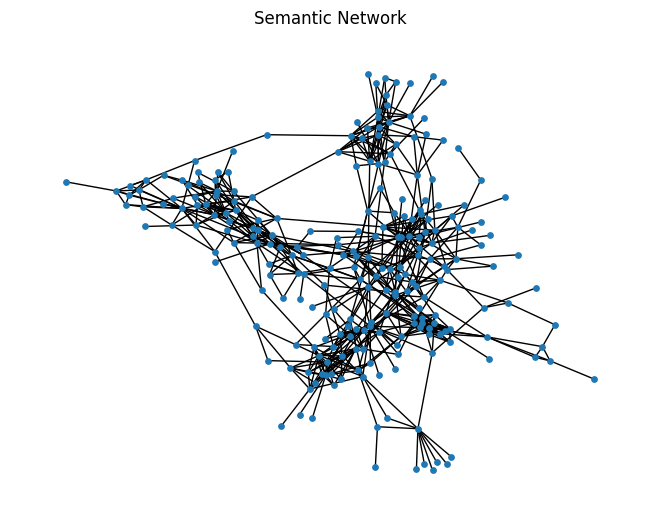

In [4]:
G_N=nx.from_pandas_edgelist(N_animal,source="abeja",target="abejorro")
#G_N=nx.from_pandas_edgelist(N_animal,source=0,target=1)
G_N=nx.Graph(G_N)
g_N=nx.draw(G_N,node_size=15)
plt.title("Semantic Network")
plt.savefig('Semantic network without labels.png', dpi=300)

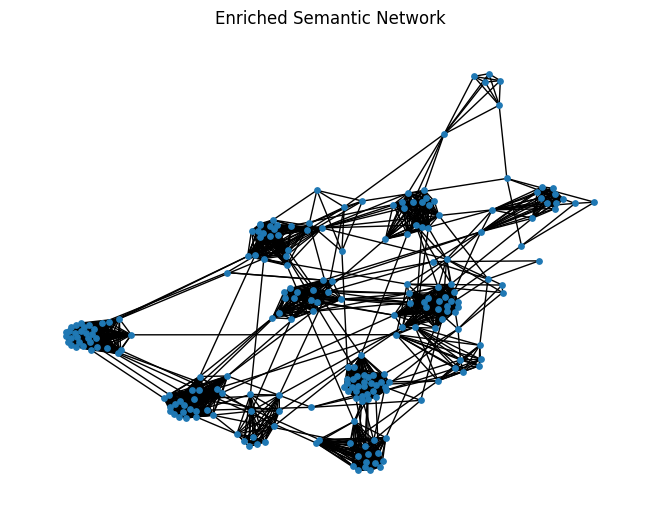

In [5]:
EG_N=nx.from_pandas_edgelist(EN_animal,source="abeja",target="abejorro")
EG_N=nx.Graph(EG_N)
Eg_N=nx.draw(EG_N,node_size=15)
plt.title("Enriched Semantic Network")
plt.savefig('Enriched Semantic network without labels.png', dpi=300)

In [6]:
Num_nodes_N=nx.number_of_nodes(G_N)
Num_edges_N=nx.number_of_edges(G_N)
Ave_clust_N=nx.average_clustering(G_N)
degree=nx.degree(G_N)
degree=pd.DataFrame(degree)
mean_degree_N=np.mean(degree.iloc[:,1])
ave_short_p=nx.average_shortest_path_length(G_N)

print("-"*60+"\nSummarize of the network""\n"+"-"*60+"\nNumber of nodes:",Num_nodes_N,"\nNumber of edges:",Num_edges_N,
      "\nAverage clustering:","{:.2f}".format(Ave_clust_N),"\nMean degree:","{:.2f}".format(mean_degree_N),
      "\nAverage shortest path:","{:.2f}".format(ave_short_p),"\n"+"-"*30)


------------------------------------------------------------
Summarize of the network
------------------------------------------------------------
Number of nodes: 236 
Number of edges: 610 
Average clustering: 0.33 
Mean degree: 5.17 
Average shortest path: 4.42 
------------------------------


In [7]:
ENum_nodes_N=nx.number_of_nodes(EG_N)
ENum_edges_N=nx.number_of_edges(EG_N)
EAve_clust_N=nx.average_clustering(EG_N)
Edegree=nx.degree(EG_N)
Edegree=pd.DataFrame(Edegree)
Emean_degree_N=np.mean(Edegree.iloc[:,1])
Eave_short_p=nx.average_shortest_path_length(EG_N)

print("-"*60+"\nSummarize of the network""\n"+"-"*60+"\nNumber of nodes:",ENum_nodes_N,"\nNumber of edges:",ENum_edges_N,
      "\nAverage clustering:","{:.2f}".format(EAve_clust_N),"\nMean degree:","{:.2f}".format(Emean_degree_N),
      "\nAverage shortest path:","{:.2f}".format(Eave_short_p),"\n"+"-"*30)


------------------------------------------------------------
Summarize of the network
------------------------------------------------------------
Number of nodes: 236 
Number of edges: 2356 
Average clustering: 0.87 
Mean degree: 19.97 
Average shortest path: 3.25 
------------------------------


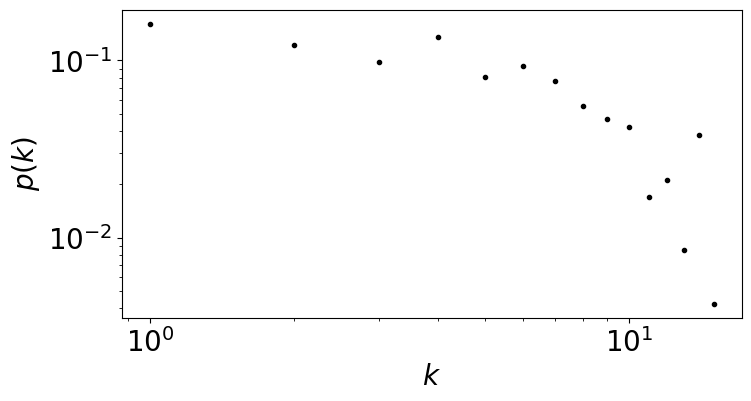

In [8]:
degree_sequence = sorted((d for n, d in G_N.degree()), reverse=True)
val,freq=np.unique(degree_sequence, return_counts=True)

plt.figure(figsize=(8,4))
plt.loglog(val,freq/sum(freq),'k.')
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$p(k)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("Dist_grado_loglog.png", bbox_inches="tight")
plt.show()

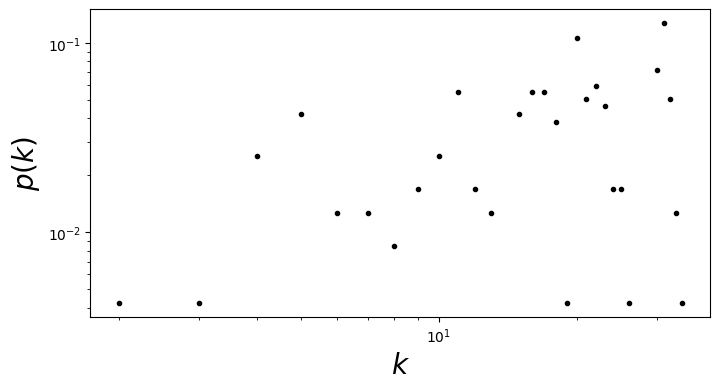

In [9]:
degree_sequence1 = sorted((d for n, d in EG_N.degree()), reverse=True)
val1,freq1=np.unique(degree_sequence1, return_counts=True)

plt.figure(figsize=(8,4))
plt.loglog(val1,freq1/sum(freq1),'k.')
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$p(k)$',size=20)
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.savefig("Dist_grado_loglog.png", bbox_inches="tight")
plt.show()

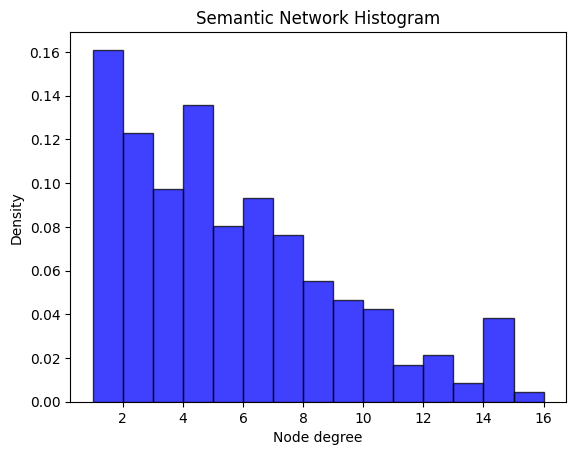

In [10]:
hist_degree = [d for n, d in G_N.degree()]
plt.hist(hist_degree, bins=range(1, max(hist_degree)+2), density=True, alpha=0.75, color='b', edgecolor='black')
plt.title("Semantic Network Histogram")
plt.xlabel("Node degree")
plt.ylabel("Density")
plt.savefig('Semantic Network Histogram.png', dpi=300)


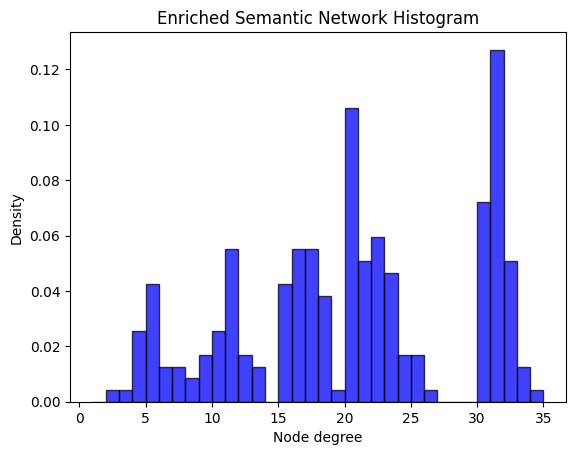

In [11]:
Ehist_degree = [d for n, d in EG_N.degree()]
plt.hist(Ehist_degree, bins=range(1, max(Ehist_degree)+2), density=True, alpha=0.75, color='b', edgecolor='black')
plt.title("Enriched Semantic Network Histogram")
plt.xlabel("Node degree")
plt.ylabel("Density")
plt.savefig('Enriched Semantic Network Histogram.png', dpi=300)

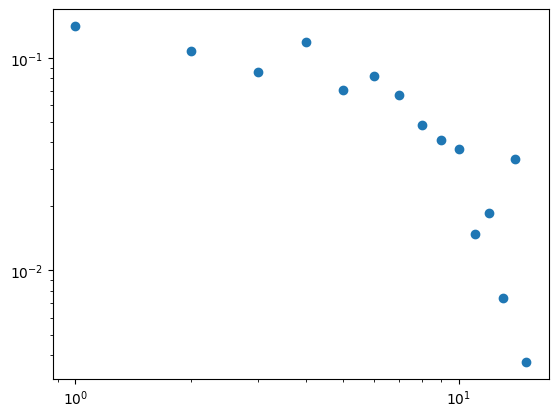

In [12]:
degree_sequence = [d for n, d in G_N.degree()]
degree_counts = nx.degree_histogram(G_N)
degree_counts.pop(0)
degree_counts=np.array(degree_counts)
plt.scatter(range(1,len(degree_counts)+1), degree_counts/269)
plt.xscale('log')  # Eje x en escala logarítmica
plt.yscale('log')

------------------------------------------------------------
Summarize of the degree distribution
------------------------------------------------------------
Solpe:-1.061 
Intercept: -0.483 
------------------------------


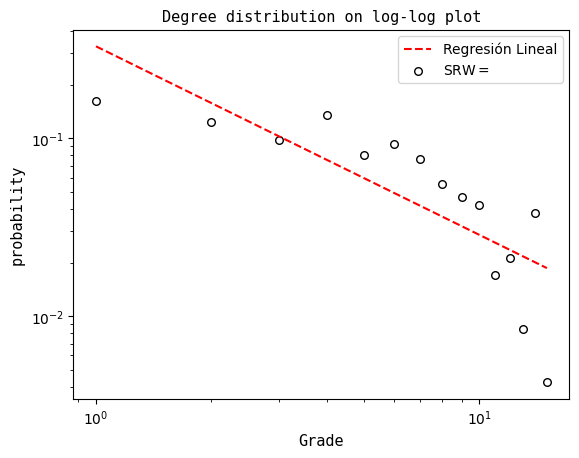

In [13]:
log_x=np.log10(range(1,len(degree_counts)+1))
log_y=np.log10(degree_counts/236)
coeficients = np.polyfit(log_x, log_y, 1)  # 1 indica un ajuste lineal
# Crear el modelo de regresión lineal
slope, intercept = coeficients
modelo_lineal = lambda x: 10**(slope * np.log10(x) + intercept)
#slope, intercept = coeficients
#modelo_lineal = lambda x: 10**(slope * np.log10(x) + intercept)
typewriter_font = {'family': 'monospace', 'size': 11}
plt.plot(range(1,len(degree_counts)+1), modelo_lineal(range(1,len(degree_counts)+1)),"--", label='Regresión Lineal', color='red')
plt.scatter(range(1,len(degree_counts)+1), degree_counts/236,s=30, facecolors='white', edgecolors='black', alpha=1,label="SRW$=$")
plt.xscale('log')  # Eje x en escala logarítmica
plt.yscale('log')  # Eje y en escala logarítmica
plt.legend()
plt.title("Degree distribution on log-log plot",fontdict=typewriter_font)
plt.xlabel("Grade",fontdict=typewriter_font)
plt.ylabel("probability",fontdict=typewriter_font)
plt.savefig('Degree distribution on log-log plot.png', dpi=300)

#plt.show()
print("-"*60+"\nSummarize of the degree distribution""\n"+"-"*60+
      "\nSolpe:""{:.3f}".format(slope),"\nIntercept:","{:.3f}".format(intercept),"\n"+"-"*30)


In [14]:
density=nx.density(G_N)
centrality=nx.centrality.eigenvector_centrality_numpy(G_N)
key_max=max(centrality, key=lambda k: centrality[k])
value_max=centrality[key_max]
print("-"*60+"\nSummarize of Eigenvector centrality and Density for the SN"
      "\n"+"-"*60+"\nDensity:""{:.3f}".format(density),"\nCentrality value max:",
      "{:.3f}".format(value_max),"\n"+"-"*30)


------------------------------------------------------------
Summarize of Eigenvector centrality and Density for the SN
------------------------------------------------------------
Density:0.022 
Centrality value max: 0.353 
------------------------------


In [15]:
Edensity=nx.density(EG_N)
Ecentrality=nx.centrality.eigenvector_centrality_numpy(EG_N)
Ekey_max=max(Ecentrality, key=lambda k: Ecentrality[k])
Evalue_max=Ecentrality[Ekey_max]
print("-"*60+"\nSummarize of Eigenvector centrality and Density for the ESN"
      "\n"+"-"*60+"\nDensity:""{:.3f}".format(Edensity),"\nCentrality value max:",
      "{:.3f}".format(Evalue_max),"\n"+"-"*30)

------------------------------------------------------------
Summarize of Eigenvector centrality and Density for the ESN
------------------------------------------------------------
Density:0.085 
Centrality value max: 0.178 
------------------------------


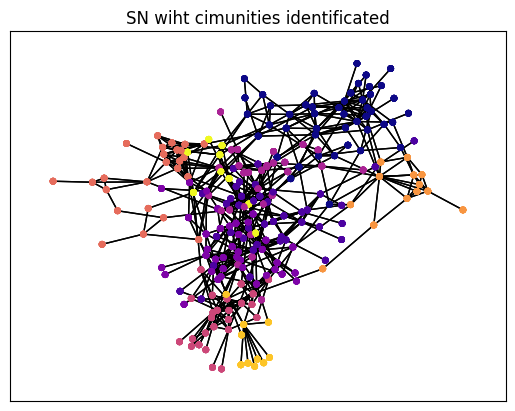

In [16]:
comunities=nx.community.greedy_modularity_communities(G_N)
comunities=list(comunities)
color_map = {}
for i, comunity in enumerate(comunities):
    for node in comunity:
        color_map[node] = i

pos=nx.spring_layout(G_N)
node_colors = [color_map[n] for n in G_N.nodes]

for i, comunity in enumerate(comunities):
    nx.draw_networkx_nodes(G_N,pos=pos, node_color=node_colors,cmap=plt.get_cmap("plasma"),node_size=15)
nx.draw_networkx_edges(G_N,pos=pos)
nx.draw_networkx_edges(G_N,pos=pos)
plt.title("SN wiht cimunities identificated")
plt.savefig('SN wiht cimunities identificated.png', dpi=300)


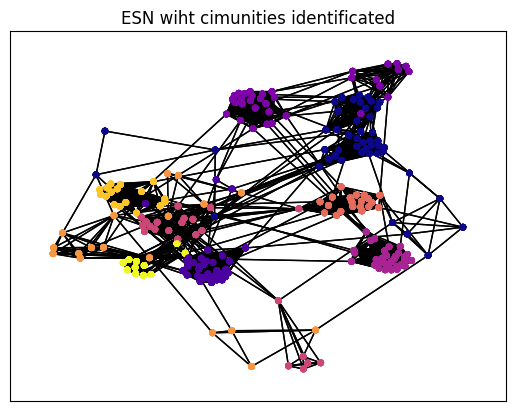

In [17]:
Ecomunities=nx.community.greedy_modularity_communities(EG_N)
Ecomunities=list(Ecomunities)
color_map = {}
for i, comunity in enumerate(Ecomunities):
    for node in comunity:
        color_map[node] = i

pos=nx.spring_layout(EG_N)
node_colors = [color_map[n] for n in EG_N.nodes]

for i, comunity in enumerate(Ecomunities):
    nx.draw_networkx_nodes(EG_N,pos=pos, node_color=node_colors,cmap=plt.get_cmap("plasma"),node_size=15)
nx.draw_networkx_edges(EG_N,pos=pos)
nx.draw_networkx_edges(EG_N,pos=pos)
plt.title("ESN wiht cimunities identificated")
plt.savefig('ESN wiht cimunities identificated.png', dpi=300)

In [18]:
communities_transposed = list(map(list, zip(*comunities)))
with open("Size_comunities.txt", "w") as file:
    for i, column in enumerate(communities_transposed):
        community_size = len(column)
        file.write(f"Community {i + 1} (Size {community_size}):\n")
        file.write("\n\n")
print("Size of Communities saved at community.txt")

Size of Communities saved at community.txt


In [19]:
Ecommunities_transposed = list(map(list, zip(*Ecomunities)))
with open("Size_Ecomunities.txt", "w") as file:
    for i, column in enumerate(Ecommunities_transposed):
        community_size = len(column)
        file.write(f"Community {i + 1} (Size {community_size}):\n")
        file.write("\n\n")
print("Size of ECommunities saved at Ecommunity.txt")

Size of ECommunities saved at Ecommunity.txt


In [20]:
with open("community.txt", "w") as file:
    for i, comunity in enumerate(comunities):
        file.write(f"Comunidad {i + 1}:\n")        
        for member in comunity:
            file.write(f"{member}\n")
        file.write("\n\n")
print("Comunity saved at community.txt")

Comunity saved at community.txt


In [21]:
with open("Ecommunity.txt", "w") as file:
    for i, comunity in enumerate(Ecomunities):
        file.write(f"Comunidad {i + 1}:\n")        
        for member in comunity:
            file.write(f"{member}\n")
        file.write("\n\n")
print("Comunity saved at Ecommunity.txt")

Comunity saved at Ecommunity.txt


In [22]:
adjacency_matrix=nx.adjacency_matrix(G_N).toarray()
adjacency_matrix=pd.DataFrame(adjacency_matrix,dtype=float)
adjacency_matrix.to_csv('adjacencym.csv', index=False)

### For enriched network

In [23]:
Eadjacency_matrix=nx.adjacency_matrix(EG_N).toarray()
Eadjacency_matrix=pd.DataFrame(Eadjacency_matrix,dtype=float)
Eadjacency_matrix.to_csv('Eadjacencym.csv', index=False)

## Calculate de srw for diferent bias

### Iqual bias

In [24]:
""""transition matrix"""
"""Transition=adjacency_matrix/adjacency_matrix.sum(axis=1)
transition=Transition.to_numpy()
transition=np.transpose(transition)"""
transition=pd.read_csv("transition_ani.csv",header=None)
transition=np.array(transition)

In [25]:
""""E transition matrix"""
"""ETransition=Eadjacency_matrix/Eadjacency_matrix.sum(axis=1)
Etransition=ETransition.to_numpy()
Etransition=np.transpose(Etransition)"""
Etransition=pd.read_csv("Etransition_ani.csv",header=None)
Etransition=np.array(Etransition)


In [26]:
"""matrixc=adjacency_matrix
matrixc[matrixc == matrixc] = 1/236
matrixc=matrixc.to_numpy()
matrixc=np.transpose(matrixc)
"""
matrixc=pd.read_csv("srwiq.csv",header=None)
matrixc=np.array(matrixc)

numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    mi = srw(q,transition, matrixc) 
    globals()[f"mi{i}"] = mi
    q += rango


#### for Enriched

In [27]:
"""Ematrixc=Eadjacency_matrix
Ematrixc[Ematrixc == Ematrixc] = 1/236
Ematrixc=Ematrixc.to_numpy()
Ematrixc=np.transpose(Ematrixc)"""

Ematrixc=pd.read_csv("srwiq.csv",header=None)
Ematrixc=np.array(Ematrixc)

"""SECOND= define a srwecuaction"""
def srw(q,mc,ms):
    return q*ms + (1-q)*mc

numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    Emi = srw(q,Etransition, Ematrixc) 
    globals()[f"Emi{i}"] = Emi
    q += rango

### positive gradient bias srw+

In [28]:
"""adjacency_matrix=nx.adjacency_matrix(G_N).toarray()
row_sums=[]
for row in adjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
total=sum(row_sums)
row_sums=row_sums/total
matrixcp=np.tile(row_sums, (236, 1))
"""

matrixcp=pd.read_csv("srwmas.csv",header=None)
matrixcp=np.array(matrixcp)
transition=pd.read_csv("transition_ani.csv",header=None)
transition=transition.to_numpy()
numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    miplus=srw(q,transition,matrixcp)
    globals()[f"miplus{i}"]=miplus
    q+=rango

In [29]:
"""Eadjacency_matrix=nx.adjacency_matrix(EG_N).toarray()
row_sums=[]
for row in Eadjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
total=sum(row_sums)
row_sums=row_sums/total
Ematrixcp=np.tile(row_sums, (236, 1))"""

Ematrixcp=pd.read_csv("Esrwmas.csv",header=None)
Ematrixcp=np.array(Ematrixcp)

numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    Emiplus=srw(q,Etransition,Ematrixcp)
    globals()[f"Emiplus{i}"]=Emiplus
    q+=rango

### Negative gradient srw-

In [30]:
"""adjacency_matrix=nx.adjacency_matrix(G_N).toarray()
row_sums=[]
for row in adjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
maxgrade=max(row_sums)
row_sums=(maxgrade+1-row_sums)
total=sum(row_sums)
entri=row_sums/total
matrixcm=np.tile(entri, (236, 1))"""

matrixcm=pd.read_csv("srwmenos.csv",header=None)
matrixcm=np.array(matrixcm)

numeromatrices = 40
rango = 1 / numeromatrices
q = 0
for i in range(0,numeromatrices+1):
    mim=srw(q,transition,matrixcm)
    globals()[f"mim{i}"]=mim
    q+=rango


In [31]:
"""Eadjacency_matrix=nx.adjacency_matrix(EG_N).toarray()
row_sums=[]
for row in adjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
Emaxgrade=max(row_sums)
row_sums=(Emaxgrade+1-row_sums)
total=sum(row_sums)
entri=row_sums/total
Ematrixcm=np.tile(entri, (236, 1))"""

Ematrixcm=pd.read_csv("Esrwmenos.csv",header=None)
Ematrixcm=np.array(Ematrixcm)

numeromatrices = 40
rango = 1 / numeromatrices
q = 0
for i in range(0,numeromatrices+1):
    Emim=srw(q,Etransition,Ematrixcm)
    globals()[f"Emim{i}"]=Emim
    q+=rango

## Mean First Passage Time (MFPT) for the markov process

### Calculate MFPT to swr= bias

In [32]:
for i in range(numeromatrices+1):
    mi=globals()[f"mi{i}"]
    mie=stationary_vector(mi)
    globals()[f"mie{i}"]=mie

for i in range(numeromatrices+1):
    mie=globals()[f"mie{i}"]
    wi=wmatrix(mie)
    globals()[f"wi{i}"]=wi

for i in range(numeromatrices+1):
    wi=globals()[f"wi{i}"]
    mi=globals()[f"mi{i}"]
    zi = zmatrix(wi,mi)
    globals()[f"zi{i}"]=zi

for i in range(numeromatrices+1):
    zi=globals()[f"zi{i}"]
    mie=globals()[f"mie{i}"]
    mfpti=meanFirstPassageTime(zi,mie)
    globals()[f"mfpti{i}"]=mfpti

In [33]:
for i in range(numeromatrices+1):
    Emi=globals()[f"Emi{i}"]
    Emie=stationary_vector(Emi)
    globals()[f"Emie{i}"]=Emie

for i in range(numeromatrices+1):
    Emie=globals()[f"Emie{i}"]
    Ewi=wmatrix(Emie)
    globals()[f"Ewi{i}"]=Ewi

for i in range(numeromatrices+1):
    Ewi=globals()[f"Ewi{i}"]
    Emi=globals()[f"Emi{i}"]
    Ezi = zmatrix(Ewi,Emi)
    globals()[f"Ezi{i}"]=Ezi

for i in range(numeromatrices+1):
    Ezi=globals()[f"Ezi{i}"]
    Emie=globals()[f"Emie{i}"]
    Emfpti=meanFirstPassageTime(Ezi,Emie)
    globals()[f"Emfpti{i}"]=Emfpti


In [33]:
len(wi0)

236

### Calculate MFPT to swr+ bias

In [34]:
for i in range(numeromatrices+1):
    miplus=globals()[f"miplus{i}"]
    mieplus=stationary_vector(miplus)
    globals()[f"mieplus{i}"]=mieplus

for i in range(numeromatrices+1):
    mieplus=globals()[f"mieplus{i}"]
    wiplus=wmatrix(mieplus)
    globals()[f"wiplus{i}"]=wiplus

for i in range(numeromatrices+1):
    wiplus=globals()[f"wiplus{i}"]
    miplus=globals()[f"miplus{i}"]
    ziplus = zmatrix(wiplus,miplus)
    globals()[f"ziplus{i}"]=ziplus


for i in range(numeromatrices+1):
    ziplus=globals()[f"ziplus{i}"]
    mieplus=globals()[f"mieplus{i}"]
    mfptiplus=meanFirstPassageTime(ziplus,mieplus)
    globals()[f"mfptiplus{i}"]=mfptiplus

In [35]:
for i in range(numeromatrices+1):
    Emiplus=globals()[f"Emiplus{i}"]
    Emieplus=stationary_vector(Emiplus)
    globals()[f"Emieplus{i}"]=Emieplus

for i in range(numeromatrices+1):
    Emieplus=globals()[f"Emieplus{i}"]
    Ewiplus=wmatrix(Emieplus)
    globals()[f"Ewiplus{i}"]=Ewiplus

for i in range(numeromatrices+1):
    Ewiplus=globals()[f"Ewiplus{i}"]
    Emiplus=globals()[f"Emiplus{i}"]
    Eziplus = zmatrix(Ewiplus,Emiplus)
    globals()[f"Eziplus{i}"]=Eziplus


for i in range(numeromatrices+1):
    Eziplus=globals()[f"Eziplus{i}"]
    Emieplus=globals()[f"Emieplus{i}"]
    Emfptiplus=meanFirstPassageTime(Eziplus,Emieplus)
    globals()[f"Emfptiplus{i}"]=Emfptiplus

### Calculate MFPT to swr- bias

In [36]:
for i in range(numeromatrices+1):
    mim=globals()[f"mim{i}"]
    miem=stationary_vector(mim)
    globals()[f"miem{i}"]=miem
for i in range(numeromatrices+1):
    miem=globals()[f"miem{i}"]
    wim=wmatrix(miem)
    globals()[f"wim{i}"]=wim

for i in range(numeromatrices+1):
    wim=globals()[f"wim{i}"]
    mim=globals()[f"mim{i}"]
    zim = zmatrix(wim,mim)
    globals()[f"zim{i}"]=zim

for i in range(numeromatrices+1):
    zim=globals()[f"zim{i}"]
    miem=globals()[f"miem{i}"]
    mfptim=meanFirstPassageTime(zim,miem)
    globals()[f"mfptim{i}"]=mfptim

In [37]:
for i in range(numeromatrices+1):
    Emim=globals()[f"Emim{i}"]
    Emiem=stationary_vector(Emim)
    globals()[f"Emiem{i}"]=Emiem
for i in range(0,numeromatrices+1):
    Emiem=globals()[f"Emiem{i}"]
    Ewim=wmatrix(Emiem)
    globals()[f"Ewim{i}"]=Ewim

for i in range(numeromatrices+1):
    Ewim=globals()[f"Ewim{i}"]
    Emim=globals()[f"Emim{i}"]
    Ezim = zmatrix(Ewim,Emim)
    globals()[f"Ezim{i}"]=Ezim

for i in range(numeromatrices+1):
    Ezim=globals()[f"Ezim{i}"]
    Emiem=globals()[f"Emiem{i}"]
    Emfptim=meanFirstPassageTime(Ezim,Emiem)
    globals()[f"Emfptim{i}"]=Emfptim

## Entropy Rate

### Entropi rate srw=

In [38]:
"""l=np.log10(mi0)
l[np.isneginf(l)] = 0.
Hi0=-np.sum(mi0*l,axis=1)
hi0=np.dot(mie0,Hi0)"""
for i in range(0,numeromatrices+1):
    mi=globals()[f"mi{i}"]
    mie=globals()[f"mie{i}"]
    l=np.log10(mi)
    l[np.isneginf(l)] = 0.
    l=np.nan_to_num(l, nan=0)
    Hi=-np.sum(mi*l,axis=1)
    hi=np.dot(mie,Hi)
    globals()[f"hi{i}"]=hi



C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\1927627933.py:8: RuntimeWarning:

divide by zero encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\1927627933.py:8: RuntimeWarning:

invalid value encountered in log10



In [39]:
"""l=np.log10(Emi0)
l[np.isneginf(l)] = 0.
EHi0=-np.sum(Emi0*l,axis=1)
Ehi0=np.dot(Emie0,EHi0)
"""
for i in range(0,numeromatrices+1):
    Emi=globals()[f"Emi{i}"]
    Emie=globals()[f"Emie{i}"]
    l=np.log10(Emi)
    l[np.isneginf(l)] = 0.
    l=np.nan_to_num(l, nan=0)
    EHi=-np.sum(Emi*l,axis=1)
    globals()[f"EHi{i}"]=EHi
    Ehi=np.dot(Emie,EHi)
    globals()[f"Ehi{i}"]=Ehi


C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\209472909.py:9: RuntimeWarning:

divide by zero encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\209472909.py:9: RuntimeWarning:

invalid value encountered in log10



### Entropi rate srw+

In [40]:
"""l=np.log10(miplus0)
l[np.isneginf(l)] = 0.
Hip0=-np.sum(miplus0*l,axis=1)
hip0=np.dot(mieplus0,Hip0)
"""
for i in  range(0,numeromatrices+1):
    mip=globals()[f"miplus{i}"]
    mieplus=globals()[f"mieplus{i}"]
    l=np.log10(mip)
    l[np.isneginf(l)] = 0.
    Hswrip=-np.sum(mip * l,axis=1)
    hip=np.dot(mieplus,Hswrip)
    globals()[f"hip{i}"]=hip


C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\2097500367.py:9: RuntimeWarning:

divide by zero encountered in log10



In [41]:
"""l=np.log10(Emiplus0)
l[np.isneginf(l)] = 0.
EHswrip0=-np.sum(Emiplus0 * l,axis=1)
Ehip0=np.dot(Emieplus0,EHswrip0)
"""
for i in  range(0,numeromatrices+1):
    Emip=globals()[f"Emiplus{i}"]
    Emieplus=globals()[f"Emieplus{i}"]
    l=np.log10(Emip)
    l[np.isneginf(l)] = 0.
    EHswrip=-np.sum(Emip *l,axis=1)
    globals()[f"EHswrip{i}"]=EHswrip
    Ehip=np.dot(Emieplus,EHswrip)
    globals()[f"Ehip{i}"]=Ehip

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\2248280137.py:9: RuntimeWarning:

divide by zero encountered in log10



### Entropi rate srw-

In [42]:
"""l=np.log10(mim0)
l[np.isneginf(l)] = 0.
Hswrim0=-np.sum(mim0 * l,axis=1)
him0=np.dot(miem0,Hswrim0)
"""
for i in  range(0,numeromatrices+1):
    mim=globals()[f"mim{i}"]
    miem=globals()[f"miem{i}"]
    l=np.log10(mim)
    l[np.isneginf(l)] = 0.
    Hswrim=-np.sum(mim * l,axis=1)
    globals()[f"Hswrim{i}"]=Hswrim
    him=np.dot(miem,Hswrim)
    globals()[f"him{i}"]=him

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\855195236.py:9: RuntimeWarning:

divide by zero encountered in log10



In [43]:
"""l=np.log10(Emim0)
l[np.isneginf(l)] = 0.
EHswrim0=-np.sum(Emim0 * l,axis=1)
Ehim0=np.dot(Emiem0,EHswrim0)
"""

for i in  range(0,numeromatrices+1):
    Emim=globals()[f"Emim{i}"]
    Emiem=globals()[f"Emiem{i}"]
    l=np.log10(Emim)
    l[np.isneginf(l)] = 0.
    EHswrim=-np.sum(Emim * l,axis=1)
    globals()[f"EHswrim{i}"]=EHswrim
    Ehim=np.dot(Emiem,EHswrim)
    globals()[f"Ehim{i}"]=Ehim


C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\1512885812.py:10: RuntimeWarning:

divide by zero encountered in log10



#### Entropy

In [44]:
l=np.log10(mi0)
l[np.isneginf(l)] = 0.
Hi0=-np.sum(mi0*l)
for i in range(1,numeromatrices+1):
    mi=globals()[f"mi{i}"]
    mie=globals()[f"mie{i}"]
    l=np.log10(mi)
    l[np.isneginf(l)] = 0.
    Hi=-np.sum(mi*np.log10(mi))
    globals()[f"Hi{i}"]=Hi

l=np.log10(miplus0)
l[np.isneginf(l)] = 0.
Hswrip0=-np.sum(miplus0*l)
for i in  range(1,numeromatrices+1):
    mip=globals()[f"miplus{i}"]
    mieplus=globals()[f"mieplus{i}"]
    l=np.log10(mip)
    l[np.isneginf(l)] = 0.
    Hswrip=-np.sum(mip * np.log10(mip))
    globals()[f"Hswrip{i}"]=Hswrip


l=np.log10(mim0)
l[np.isneginf(l)] = 0.
Hswrim0=-np.sum(mim0*l)
for i in  range(1,numeromatrices+1):
    mim=globals()[f"mim{i}"]
    miem=globals()[f"miem{i}"]
    l=np.log10(mim)
    l[np.isneginf(l)] = 0.
    Hswrim=-np.sum(mim * np.log10(mim))
    globals()[f"Hswrim{i}"]=Hswrim
Hiq=[]
Hplus=[]
Hm=[]
Q=[]
q=0
Q.append(q)
for i in range(numeromatrices+1):
    Hiqi=globals()[f"Hi{i}"]
    Hiq.append(Hiqi)




for i in range(numeromatrices+1):
    Hplusi=globals()[f"Hswrip{i}"]
    Hplus.append(Hplusi)




for i in range(numeromatrices+1):
    Hmi=globals()[f"Hswrim{i}"]
    Hm.append(Hmi)


for i in range(numeromatrices):
    q+=rango
    Q.append(q)

hiq=[]
hplus=[]
hm=[]

for i in range(numeromatrices+1):
    hiqi=globals()[f"hi{i}"]
    hiq.append(hiqi)




for i in range(numeromatrices+1):
    hplusi=globals()[f"hip{i}"]
    hplus.append(hplusi)




for i in range(numeromatrices+1):
    hmi=globals()[f"him{i}"]
    hm.append(hmi)

EHiq=[]
EHplus=[]
EHm=[]
Ehiq=[]
Ehplus=[]
Ehm=[]
Q=[]
q=0
Q.append(q)
for i in range(numeromatrices+1):
    EHiqi=globals()[f"EHi{i}"]
    Ehiqi=globals()[f"Ehi{i}"]
    EHiq.append(EHiqi)
    Ehiq.append(Ehiqi)




for i in range(numeromatrices+1):
    EHplusi=globals()[f"EHswrip{i}"]
    Ehplusi=globals()[f"Ehip{i}"]
    EHplus.append(EHplusi)
    Ehplus.append(Ehplusi)





for i in range(numeromatrices+1):
    EHmi=globals()[f"EHswrim{i}"]
    EHm.append(EHmi)
    Ehmi=globals()[f"Ehim{i}"]
    Ehm.append(Ehmi)


for i in range(numeromatrices):
    q+=rango
    Q.append(q)



C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:1: RuntimeWarning:

divide by zero encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:7: RuntimeWarning:

divide by zero encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:9: RuntimeWarning:

divide by zero encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:9: RuntimeWarning:

invalid value encountered in multiply

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:7: RuntimeWarning:

invalid value encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:9: RuntimeWarning:

invalid value encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:12: RuntimeWarning:

divide by zero encountered in log10

C:\Users\gusta\AppData\Local\Temp\ipykernel_5924\4887425.py:24: RuntimeWarning:

divide by zero encountered in log10



## Graphics

### MFPT vs Q

In [45]:
mfptiq=[]
mfptplus=[]
mfptm=[]
Emfptiq=[]
Emfptplus=[]
Emfptm=[]
Q=[]
q=0
Q.append(q)
for i in range(numeromatrices):
    q+=rango
    Q.append(q)
    
for i in range(0,numeromatrices+1):
    mfptiq.append(globals()[f"mfpti{i}"])
    mfptplus.append(globals()[f"mfptiplus{i}"])
    mfptm.append(globals()[f"mfptim{i}"])
    Emfptiq.append( globals()[f"Emfpti{i}"])
    Emfptplus.append(globals()[f"Emfptiplus{i}"])
    Emfptm.append(globals()[f"Emfptim{i}"])

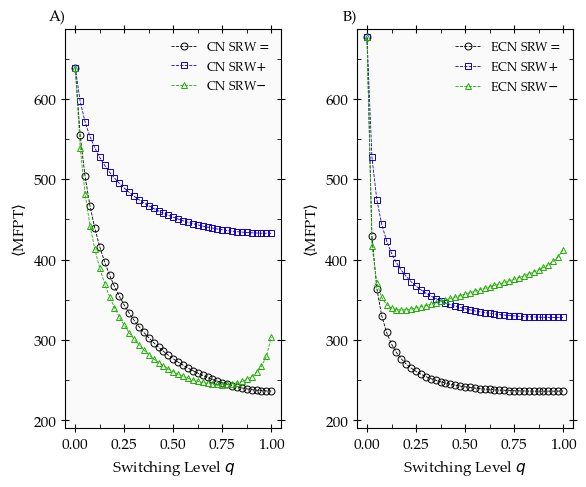

In [46]:
from matplotlib.ticker import MaxNLocator,AutoMinorLocator
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(6, 5))
#------------------------------------------------------
ax1.plot(Q,mfptiq,c="#000000",marker="o",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"CN SRW$=$",alpha=1)
ax1.plot(Q,mfptplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"CN SRW$+$",alpha=1)
ax1.plot(Q,mfptm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"CN SRW$-$",alpha=1)



#------------------------------------------------------
ax2.plot(Q,Emfptiq,c="#000000",linestyle='--',marker="o",markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"ECN SRW$=$",alpha=1)
ax2.plot(Q,Emfptplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"ECN SRW$+$",alpha=1)
ax2.plot(Q,Emfptm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"ECN SRW$-$",alpha=1)







#---------------------------------------------------------------------------------
y_min = min(np.array(mfptiq).min(), np.array(Emfptiq).min())
y_max = max(np.array(mfptiq).max(), np.array(Emfptiq).max())




ax1.text(-0, 1.05, 'A)', transform=ax1.transAxes, fontsize=11, va='top', ha='right')
ax2.text(-0, 1.05, 'B)', transform=ax2.transAxes, fontsize=11, va='top', ha='right')

ax1.set_xlabel(r"Switching Level $q$")
ax2.set_xlabel(r"Switching Level $q$")
ax1.set_ylabel("$\langle$MFPT$\\rangle$")
ax2.set_ylabel("$\langle$MFPT$\\rangle$")
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax1.tick_params(which='minor', direction='in',length=3,top=True, right=True)
ax2.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax2.tick_params(which='minor', direction='in',length=3,top=True, right=True)
ax1.set_ylim(190,y_max+10)
ax2.set_ylim(190,y_max+10)
legenda1=ax1.legend(prop={'size': 9})
legenda2=ax2.legend(prop={'size': 9})
legenda1.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda1.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda1.get_frame().set_linewidth(0) 
legenda2.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda2.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda2.get_frame().set_linewidth(0)
plt.tight_layout()
ax1.set_facecolor('#FAFAFA')
ax2.set_facecolor('#FAFAFA')


plt.savefig("matplotlibQMFPT.pdf")

### Entropy rate vs Q

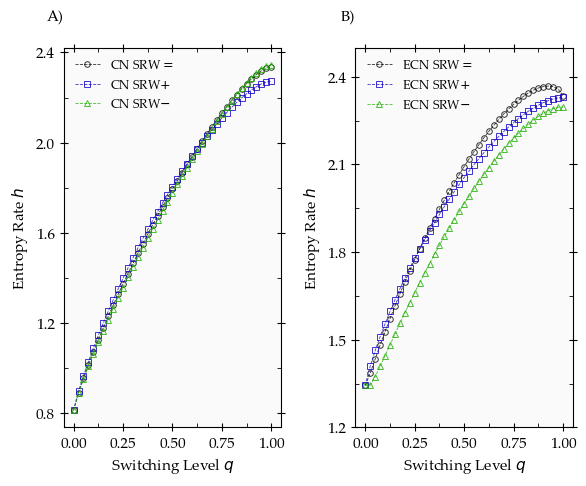

In [47]:
from matplotlib.ticker import MaxNLocator,AutoMinorLocator
plt.style.use('fast')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(6, 5))
#------------------------------------------------------
ax1.plot(Q,hiq,c="#000000",marker="o",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"CN SRW$=$",alpha=0.8)
ax1.plot(Q,hplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"CN SRW$+$",alpha=0.8)
ax1.plot(Q,hm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"CN SRW$-$",alpha=0.8)



#------------------------------------------------------
ax2.plot(Q,Ehiq,c="#000000",linestyle='--',marker="o",markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$=$",alpha=0.8)
ax2.plot(Q,Ehplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$+$",alpha=0.8)
ax2.plot(Q,Ehm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$-$",alpha=0.8)







#---------------------------------------------------------------------------------

ax1.text(-0, 1.1, 'A)', transform=ax1.transAxes, fontsize=11, va='top', ha='right')
ax2.text(-0, 1.1, 'B)', transform=ax2.transAxes, fontsize=11, va='top', ha='right')

ax1.set_xlabel(r"Switching Level $q$")
ax2.set_xlabel(r"Switching Level $q$")
ax1.set_ylabel("Entropy Rate $h$")
ax2.set_ylabel("Entropy Rate $h$")
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax1.tick_params(which='minor', direction='in',length=3,top=True, right=True)
ax2.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax2.tick_params(which='minor', direction='in',length=3,top=True, right=True)
#ax1.set_ylim(190,y_max+10)
ax2.set_ylim(1.2,2.5)
legenda1=ax1.legend(prop={'size': 9})
legenda2=ax2.legend(prop={'size': 9})
legenda1=ax1.legend(prop={'size': 9})
legenda2=ax2.legend(prop={'size': 9})
legenda1.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda1.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda1.get_frame().set_linewidth(0) 
legenda2.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda2.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda2.get_frame().set_linewidth(0)
plt.tight_layout()
ax1.set_facecolor('#FAFAFA')
ax2.set_facecolor('#FAFAFA')

plt.savefig("matplotqvsh.pdf")


### MFPT vs Entropy Rate

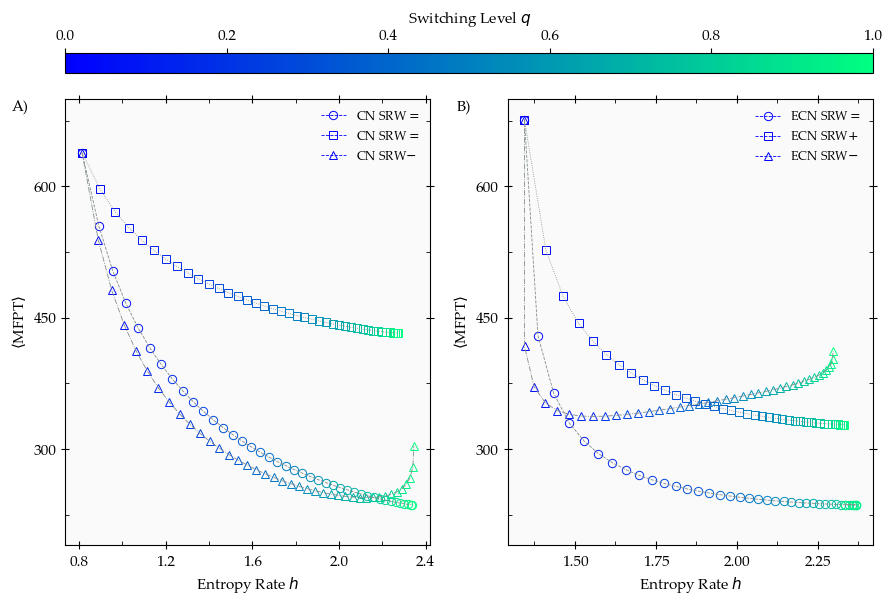

In [67]:
from matplotlib.ticker import MaxNLocator,AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap
plt.style.use('fast')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(9,6))
Q1=np.array(Q)
up=(0,0,255)
down=(255,154,0)
#custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [up,down])
custom_cmap=plt.get_cmap('winter')
norm1 = plt.Normalize(Q1.min(), Q1.max())
for i in range(len(Q)):
    ax1.plot(hiq[i], mfptiq[i], color=custom_cmap(norm1(Q[i])),marker="o",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,label='CN SRW$=$' if i == 0 else "",alpha=1.0)
    ax1.plot(hplus[i], mfptplus[i], color=custom_cmap(norm1(Q[i])),marker="s",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,label='CN SRW$=$' if i == 0 else "",alpha=1.0)
    ax1.plot(hm[i], mfptm[i], color=custom_cmap(norm1(Q[i])),marker="^",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,label=r"CN SRW$-$"if i == 0 else "",alpha=1.0)
    ax2.plot(Ehiq[i],Emfptiq[i], color=custom_cmap(norm1(Q[i])),linestyle='--',marker="o",markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,label=r"ECN SRW$=$"if i == 0 else "",alpha=1.0)
    ax2.plot(Ehplus[i],Emfptplus[i], color=custom_cmap(norm1(Q[i])),marker="s",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,label=r"ECN SRW$+$"if i == 0 else "",alpha=1.0)
    ax2.plot(Ehm[i],Emfptm[i], color=custom_cmap(norm1(Q[i])),marker="^",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,label=r"ECN SRW$-$"if i == 0 else "",alpha=1.0)

ax1.plot(hiq, mfptiq, color="#838B8B",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,alpha=1.0)    
ax1.plot(hplus, mfptplus, color="#838B8B",linestyle=':',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,alpha=1.0)
ax1.plot(hm, mfptm, color="#838B8B",linestyle='-.',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,alpha=1.0)
ax2.plot(Ehiq,Emfptiq, color="#838B8B",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,alpha=1.0)
ax2.plot(Ehplus,Emfptplus, color="#838B8B",linestyle=':',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,alpha=1.0)
ax2.plot(Ehm,Emfptm, color="#838B8B",linestyle='-.',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=6,alpha=1.0)







#---------------------------------------------------------------------------------

ax1.text(-0.1, 1, 'A)', transform=ax1.transAxes, fontsize=11, va='top', ha='right')
ax2.text(-0.1, 1, 'B)', transform=ax2.transAxes, fontsize=11, va='top', ha='right')

ax1.set_xlabel(r"Entropy Rate $h$")
ax2.set_xlabel(r"Entropy Rate $h$")
ax1.set_ylabel("$\langle$MFPT$\\rangle$")
ax2.set_ylabel("$\langle$MFPT$\\rangle$")
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', direction='inout',length=6, top=True, right=True)
ax1.tick_params(which='minor', direction='in',length=3, top=True, right=True)
ax2.tick_params(which='major', direction='inout',length=6, top=True, right=True)
ax2.tick_params(which='minor', direction='in',length=3, top=True, right=True)
ax1.set_ylim(190,700)
ax2.set_ylim(190,700)
legenda1=ax1.legend(prop={'size': 9})
legenda2=ax2.legend(prop={'size': 9})
legenda1=ax1.legend(prop={'size': 9})
legenda2=ax2.legend(prop={'size': 9})
legenda1.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda1.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda1.get_frame().set_linewidth(0) 
legenda2.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda2.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda2.get_frame().set_linewidth(0)
plt.tight_layout()
sm1 = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm1)
sm1.set_array([])
cbar =fig.colorbar(sm1, ax=[ax1, ax2],label="Switching Level $q$",aspect=40,fraction=0.08,orientation='horizontal',location='top')
ax1.set_facecolor('#FAFAFA')
ax2.set_facecolor('#FAFAFA')
plt.savefig("mathvsmfpt.pdf")

##### Para el abtract

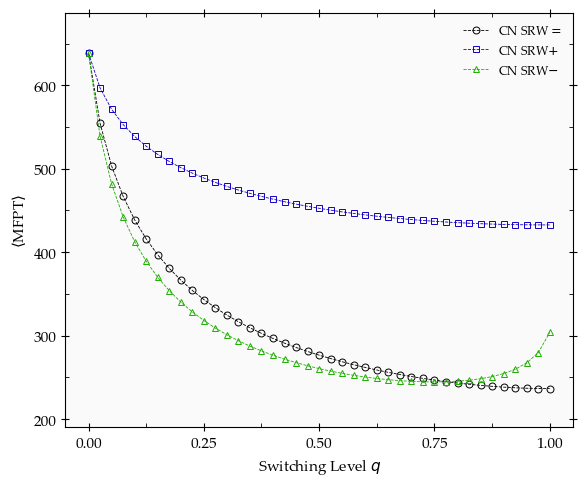

In [49]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax1) = plt.subplots(figsize=(6, 5))
#------------------------------------------------------
ax1.plot(Q,mfptiq,c="#000000",marker="o",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"CN SRW$=$",alpha=1)
ax1.plot(Q,mfptplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"CN SRW$+$",alpha=1)
ax1.plot(Q,mfptm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"CN SRW$-$",alpha=1)



#---------------------------------------------------------------------------------
#y_min = min(np.array(mfptiq).min(), np.array(Emfptiq).min())
#y_max = max(np.array(mfptiq).max(), np.array(Emfptiq).max())




#ax1.text(-0, 1.05, 'A)', transform=ax1.transAxes, fontsize=11, va='top', ha='right')

ax1.set_xlabel(r"Switching Level $q$")
ax1.set_ylabel("$\langle$MFPT$\\rangle$")
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax1.tick_params(which='minor', direction='in',length=3,top=True, right=True)
ax1.set_ylim(190,y_max+10)
legenda1=ax1.legend(prop={'size': 9})
legenda1.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda1.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda1.get_frame().set_linewidth(0) 

plt.tight_layout()
ax1.set_facecolor('#FAFAFA')

plt.savefig("mfptcn.pdf")

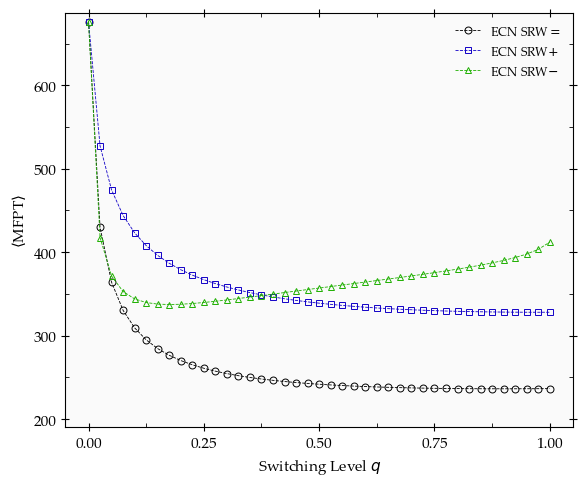

In [50]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax2) = plt.subplots(figsize=(6, 5))


#------------------------------------------------------
ax2.plot(Q,Emfptiq,c="#000000",linestyle='--',marker="o",markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"ECN SRW$=$",alpha=1)
ax2.plot(Q,Emfptplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"ECN SRW$+$",alpha=1)
ax2.plot(Q,Emfptm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=5,label=r"ECN SRW$-$",alpha=1)







#---------------------------------------------------------------------------------
y_min = min(np.array(mfptiq).min(), np.array(Emfptiq).min())
y_max = max(np.array(mfptiq).max(), np.array(Emfptiq).max())





ax2.set_xlabel(r"Switching Level $q$")
ax2.set_ylabel("$\langle$MFPT$\\rangle$")
ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax2.tick_params(which='minor', direction='in',length=3,top=True, right=True)
ax2.set_ylim(190,y_max+10)
legenda2=ax2.legend(prop={'size': 9})
legenda2.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda2.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda2.get_frame().set_linewidth(0)
plt.tight_layout()
ax2.set_facecolor('#FAFAFA')
plt.savefig("mfptecn.pdf")

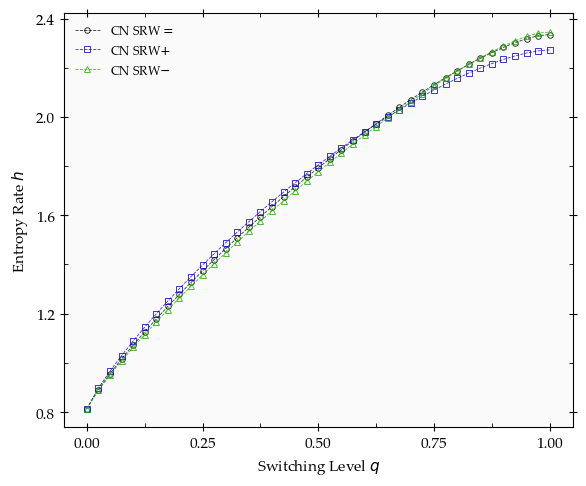

In [51]:
plt.style.use('fast')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax1) = plt.subplots(figsize=(6, 5))
#------------------------------------------------------
ax1.plot(Q,hiq,c="#000000",marker="o",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"CN SRW$=$",alpha=0.8)
ax1.plot(Q,hplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"CN SRW$+$",alpha=0.8)
ax1.plot(Q,hm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"CN SRW$-$",alpha=0.8)



#---------------------------------------------------------------------------------


ax1.set_xlabel(r"Switching Level $q$")
ax1.set_ylabel("Entropy Rate $h$")
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax1.tick_params(which='minor', direction='in',length=3,top=True, right=True)
legenda1=ax1.legend(prop={'size': 9})
legenda1=ax1.legend(prop={'size': 9})
legenda1.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda1.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda1.get_frame().set_linewidth(0) 
plt.tight_layout()
ax1.set_facecolor('#FAFAFA')
plt.savefig("entropycn.pdf")

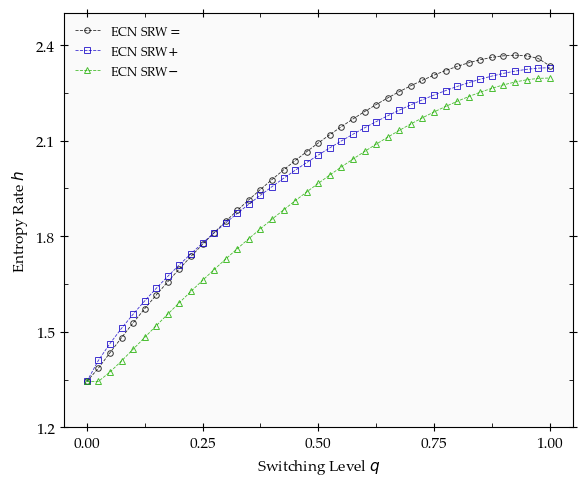

In [52]:
from matplotlib.ticker import MaxNLocator,AutoMinorLocator
plt.style.use('fast')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig, (ax2) = plt.subplots(figsize=(6, 5))


#------------------------------------------------------
ax2.plot(Q,Ehiq,c="#000000",linestyle='--',marker="o",markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$=$",alpha=0.8)
ax2.plot(Q,Ehplus,marker="s",c='#1100C7',linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$+$",alpha=0.8)
ax2.plot(Q,Ehm,marker="^",c="#1EAF00",linestyle='--',markerfacecolor='none',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$-$",alpha=0.8)







#---------------------------------------------------------------------------------


ax2.set_xlabel(r"Switching Level $q$")
ax2.set_ylabel("Entropy Rate $h$")
ax2.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.tick_params(which='major', direction='inout',length=6,top=True, right=True)
ax2.tick_params(which='minor', direction='in',length=3,top=True, right=True)
ax2.set_ylim(1.2,2.5)
legenda2=ax2.legend(prop={'size': 9})
legenda2=ax2.legend(prop={'size': 9})
legenda2.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda2.get_frame().set_edgecolor('#FAFAFA')          # Color del borde del recuadro
legenda2.get_frame().set_linewidth(0)
plt.tight_layout()
ax2.set_facecolor('#FAFAFA')
plt.savefig("entropyecn.pdf")

## SHORT TERM MEMORY

*No ejecutar aun, falta arreglar algunas cositas, principalmente en la parte donde se unen los vectores*

### MFPT para la frecuencia

In [53]:
"""mfreq=pd.read_csv("mfreq.csv",header=None)
srwi=pd.read_csv("srwinorm.csv",header=None)
srwf=pd.read_csv("SRWf_norm.csv",header=None)
Etransition=pd.read_csv("Etransition_ani.csv",header=None)
Etransition=np.array(Etransition)

numeromatrices = 40
rango = 1 / numeromatrices
q = 0
srwfa=np.array(srwf)

for i in range(0,numeromatrices+1):
    mfi = srw(q,Etransition,srwfa ) 
    globals()[f"mf{i}"] = mfi
    q += rango"""

'mfreq=pd.read_csv("mfreq.csv",header=None)\nsrwi=pd.read_csv("srwinorm.csv",header=None)\nsrwf=pd.read_csv("SRWf_norm.csv",header=None)\nEtransition=pd.read_csv("Etransition_ani.csv",header=None)\nEtransition=np.array(Etransition)\n\nnumeromatrices = 40\nrango = 1 / numeromatrices\nq = 0\nsrwfa=np.array(srwf)\n\nfor i in range(0,numeromatrices+1):\n    mfi = srw(q,Etransition,srwfa ) \n    globals()[f"mf{i}"] = mfi\n    q += rango'

### Frecuencia


*Recordatorio para el gusti* Cuando logres unir los vectores no se te olvide intentar optimzar estas celdas, estan demasiado largas. esto es un codigo, no un ensayo de literatura

In [54]:
"""lista = 50
filas = 1000
tamano = 236
numeromatrices = 40
q = 0

for i in range(numeromatrices + 1):
    globals()['estad_' + str(i)] = np.full((filas, lista), "    ")
    globals()['rep_' + str(i)] = np.arange(numeromatrices + 1)

for i in range(lista + 1):
    globals()['vector' + str(i) + 'f'] = np.arange(1, lista + 1)

for i in range(lista + 1):
    globals()['dato_' + str(i)] = np.arange(1, filas + 1)

for g in range(numeromatrices + 1):
    nom = "mf" + str(g)
    u = globals()[nom]
    matrices = np.full((filas, lista), "    ")
    dato = np.zeros(filas)  # Define dato within the loop
    
    for e in range(filas):
        vector = np.arange(1, lista + 1)
        alea = np.random.randint(0, u.shape[0])
        
        for w in range(lista):
            i = int(alea)
            x = list(range(u.shape[0]))
            vector[w] = x[i]
            matrices[e, w] = x[i]
            nuevo = np.zeros(tamano)
            nuevo_c = np.zeros(tamano)
            
            for a in range(tamano):
                nuevo[a] = 0
                nuevo_c[a] = u[i, a]
                
            x1 = np.random.uniform(0, 1)
            proba = 0
            siguiente = 1
            
            for a in range(tamano):
                proba += nuevo_c[a]
                
                if proba <= x1:
                    siguiente = a + 1
                    
            alea = nuevo[siguiente]
        
        # Calculate dato within the loop
        z = np.unique(matrices[e, :], return_counts=True)
        tabla = dict(zip(z[0], z[1]))
        frecuencia = sum(tabla.values())
        dato[e] = frecuencia
    
    rep = np.sum(dato) / filas
    q += 0.025
    
    if g == 0:
        estad_0 = matrices
        vector0f = vector
        dato_0 = dato
        rep_0 = rep
    elif g == 1:
        estad_1 = matrices
        vector1f = vector
        dato_1 = dato
        rep_1 = rep
    elif g == 2:
        estad_2 = matrices
        vector2f = vector
        dato_2 = dato
        rep_2 = rep
    elif g == 3:
        estad_3 = matrices
        vector3f = vector
        dato_3 = dato
        rep_3 = rep
    elif g == 4:
        estad_4 = matrices
        vector4f = vector
        dato_4 = dato
        rep_4 = rep
    elif g == 5:
        estad_5 = matrices
        vector5f = vector
        dato_5 = dato
        rep_5 = rep
    elif g == 6:
        estad_6 = matrices
        vector6f = vector
        dato_6 = dato
        rep_6 = rep
    elif g == 7:
        estad_7 = matrices
        vector7f = vector
        dato_7= dato
        rep_7= rep
    elif g == 8:
        estad_8 = matrices
        vector8f = vector
        dato_8 = dato
        rep_8 = rep
    elif g == 9:
        estad_9 = matrices
        vector9f = vector
        dato_9 = dato
        rep_9 = rep
    elif g == 10:
        estad_10 = matrices
        vector10f = vector
        dato_10 = dato
        rep_10 = rep
    elif g == 11:
        estad_11 = matrices
        vector11f = vector
        dato_11 = dato
        rep_11= rep
    elif g == 12:
        estad_12 = matrices
        vector12f = vector
        dato_12 = dato
        rep_12 = rep
    elif g == 13:
        estad_13 = matrices
        vector13f = vector
        dato_13 = dato
        rep_13 = rep
    elif g == 14:
        estad_14 = matrices
        vector14f = vector
        dato_14 = dato
        rep_14 = rep
    elif g == 15:
        estad_15 = matrices
        vector15f = vector
        dato_15 = dato
        rep_15 = rep
    elif g == 16:
        estad_16= matrices
        vector16f = vector
        dato_16 = dato
        rep_16 = rep
    elif g == 17:
        estad_17 = matrices
        vector17f = vector
        dato_17 = dato
        rep_17 = rep
    elif g == 18:
        estad_18 = matrices
        vector18f = vector
        dato_18 = dato
        rep_18 = rep
    elif g == 19:
        estad_19 = matrices
        vector19f = vector
        dato_19= dato
        rep_19= rep
    elif g == 20:
        estad_20 = matrices
        vector20f = vector
        dato_20 = dato
        rep_20 = rep
    elif g == 21:
        estad_21 = matrices
        vector21f = vector
        dato_21 = dato
        rep_21= rep
    elif g == 22:
        estad_22 = matrices
        vector22f = vector
        dato_22 = dato
        rep_22 = rep
    elif g == 23:
        estad_23 = matrices
        vector23f = vector
        dato_23 = dato
        rep_23 = rep
    elif g == 24:
        estad_24 = matrices
        vector24f = vector
        dato_24 = dato
        rep_24 = rep
    elif g == 25:
        estad_25 = matrices
        vector25f = vector
        dato_25 = dato
        rep_25 = rep
    elif g == 26:
        estad_26= matrices
        vector26f = vector
        dato_26 = dato
        rep_26 = rep
    elif g == 27:
        estad_27 = matrices
        vector27f = vector
        dato_27 = dato
        rep_27 = rep
    elif g == 28:
        estad_28 = matrices
        vector28f = vector
        dato_28 = dato
        rep_28 = rep
    elif g == 29:
        estad_29 = matrices
        vector29f = vector
        dato_29= dato
        rep_29= rep 
    elif g == 30:
        estad_30 = matrices
        vector30f = vector
        dato_30 = dato
        rep_30 = rep
    elif g == 31:
        estad_31 = matrices
        vector31f = vector
        dato_31 = dato
        rep_31= rep
    elif g == 32:
        estad_32 = matrices
        vector32f = vector
        dato_32 = dato
        rep_32 = rep
    elif g == 33:
        estad_33 = matrices
        vector33f = vector
        dato_33 = dato
        rep_23 = rep
    elif g == 34:
        estad_34 = matrices
        vector34f = vector
        dato_34 = dato
        rep_34 = rep
    elif g == 35:
        estad_35 = matrices
        vector35f = vector
        dato_35 = dato
        rep_35 = rep
    elif g == 36:
        estad_36= matrices
        vector36f = vector
        dato_36 = dato
        rep_36 = rep
    elif g == 37:
        estad_37 = matrices
        vector37f = vector
        dato_37 = dato
        rep_37 = rep
    elif g == 38:
        estad_38 = matrices
        vector38f = vector
        dato_38 = dato
        rep_38 = rep
    elif g == 39:
        estad_39 = matrices
        vector39f = vector
        dato_39= dato
        rep_39= rep 
    elif g == 40:
        estad_40 = matrices
        vector40f = vector
        dato_40= dato
        rep_40= rep"""

'lista = 50\nfilas = 1000\ntamano = 236\nnumeromatrices = 40\nq = 0\n\nfor i in range(numeromatrices + 1):\n    globals()[\'estad_\' + str(i)] = np.full((filas, lista), "    ")\n    globals()[\'rep_\' + str(i)] = np.arange(numeromatrices + 1)\n\nfor i in range(lista + 1):\n    globals()[\'vector\' + str(i) + \'f\'] = np.arange(1, lista + 1)\n\nfor i in range(lista + 1):\n    globals()[\'dato_\' + str(i)] = np.arange(1, filas + 1)\n\nfor g in range(numeromatrices + 1):\n    nom = "mf" + str(g)\n    u = globals()[nom]\n    matrices = np.full((filas, lista), "    ")\n    dato = np.zeros(filas)  # Define dato within the loop\n    \n    for e in range(filas):\n        vector = np.arange(1, lista + 1)\n        alea = np.random.randint(0, u.shape[0])\n        \n        for w in range(lista):\n            i = int(alea)\n            x = list(range(u.shape[0]))\n            vector[w] = x[i]\n            matrices[e, w] = x[i]\n            nuevo = np.zeros(tamano)\n            nuevo_c = np.zeros(t

#### Calculo de vectores de short term memory
Lo mismo, esto esta larguisimo, recuerda que es un codigo, no una maraton de escritores

In [55]:
"""wm_d2 = [[""] * lista for _ in range(filas)]
wm_d1 = [[""] * lista for _ in range(filas)]

#--------------------------------------------------------------------------------------------------------------------------------
wm_d1 = [[""] * lista for _ in range(filas)]
wm_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_0[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_0[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm_d1[h][ini] = estad_0[h][lugar]
            wm_d2[h][ini] = c
            ini += 1
    wm_d1[h][ini - 1] = ""
    wm_d2[h][ini - 1] = 0

# Replace None values with 0 in wm_d2
for i in range(len(wm_d2)):
    for j in range(len(wm_d2[i])):
        if wm_d2[i][j] is None:
            wm_d2[i][j] = 0
#-------------------------------------------------------------------------------------------------------------------------------
wm1_d1 = [[""] * lista for _ in range(filas)]
wm1_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_1[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_1[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm1_d1[h][ini] = estad_1[h][lugar]
            wm1_d2[h][ini] = c
            ini += 1
    wm1_d1[h][ini - 1] = ""
    wm1_d2[h][ini - 1] = 0

# Replace None values with 0 in wm1_d2
for i in range(len(wm1_d2)):
    for j in range(len(wm1_d2[i])):
        if wm1_d2[i][j] is None:
            wm1_d2[i][j] = 0
#------------------------------------------------------------------------------------------------------------------------------
wm2_d1 = [[""] * lista for _ in range(filas)]
wm2_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_2[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_2[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm2_d1[h][ini] = estad_2[h][lugar]
            wm2_d2[h][ini] = c
            ini += 1
    wm2_d1[h][ini - 1] = ""
    wm2_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm2_d2)):
    for j in range(len(wm2_d2[i])):
        if wm2_d2[i][j] is None:
            wm2_d2[i][j] = 0
#---------------------------------------------------------------------------------------------------------------------
wm3_d1 = [[""] * lista for _ in range(filas)]
wm3_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_3[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_3[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm3_d1[h][ini] = estad_3[h][lugar]
            wm3_d2[h][ini] = c
            ini += 1
    wm3_d1[h][ini - 1] = ""
    wm3_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm3_d2)):
    for j in range(len(wm3_d2[i])):
        if wm3_d2[i][j] is None:
            wm3_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm4_d1 = [[""] * lista for _ in range(filas)]
wm4_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_4[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_4[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm4_d1[h][ini] = estad_4[h][lugar]
            wm4_d2[h][ini] = c
            ini += 1
    wm4_d1[h][ini - 1] = ""
    wm4_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm4_d2)):
    for j in range(len(wm4_d2[i])):
        if wm4_d2[i][j] is None:
            wm4_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm5_d1 = [[""] * lista for _ in range(filas)]
wm5_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_5[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_5[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm5_d1[h][ini] = estad_5[h][lugar]
            wm5_d2[h][ini] = c
            ini += 1
    wm5_d1[h][ini - 1] = ""
    wm5_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm5_d2)):
    for j in range(len(wm5_d2[i])):
        if wm5_d2[i][j] is None:
            wm5_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm6_d1 = [[""] * lista for _ in range(filas)]
wm6_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_6[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_6[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm6_d1[h][ini] = estad_6[h][lugar]
            wm6_d2[h][ini] = c
            ini += 1
    wm6_d1[h][ini - 1] = ""
    wm6_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm6_d2)):
    for j in range(len(wm6_d2[i])):
        if wm6_d2[i][j] is None:
            wm6_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm7_d1 = [[""] * lista for _ in range(filas)]
wm7_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_7[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_7[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm7_d1[h][ini] = estad_7[h][lugar]
            wm7_d2[h][ini] = c
            ini += 1
    wm7_d1[h][ini - 1] = ""
    wm7_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm7_d2)):
    for j in range(len(wm7_d2[i])):
        if wm7_d2[i][j] is None:
            wm7_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm8_d1 = [[""] * lista for _ in range(filas)]
wm8_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_8[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_8[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm8_d1[h][ini] = estad_8[h][lugar]
            wm8_d2[h][ini] = c
            ini += 1
    wm8_d1[h][ini - 1] = ""
    wm8_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm8_d2)):
    for j in range(len(wm8_d2[i])):
        if wm8_d2[i][j] is None:
            wm8_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm9_d1 = [[""] * lista for _ in range(filas)]
wm9_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_9[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_9[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm9_d1[h][ini] = estad_9[h][lugar]
            wm9_d2[h][ini] = c
            ini += 1
    wm9_d1[h][ini - 1] = ""
    wm9_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm9_d2)):
    for j in range(len(wm9_d2[i])):
        if wm9_d2[i][j] is None:
            wm9_d2[i][j] = 0

#-----------------------------------------------------------------------------------------------------------------------
wm10_d1 = [[""] * lista for _ in range(filas)]
wm10_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_10[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_10[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm10_d1[h][ini] = estad_10[h][lugar]
            wm10_d2[h][ini] = c
            ini += 1
    wm10_d1[h][ini - 1] = ""
    wm10_d2[h][ini - 1] = 0

# Replace None values with 0 in wm1_d2
for i in range(len(wm10_d2)):
    for j in range(len(wm10_d2[i])):
        if wm10_d2[i][j] is None:
            wm10_d2[i][j] = 0

#------------------------------------------------------------------------------------------------------------------------------
wm11_d1 = [[""] * lista for _ in range(filas)]
wm11_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_11[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_11[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm11_d1[h][ini] = estad_11[h][lugar]
            wm11_d2[h][ini] = c
            ini += 1
    wm11_d1[h][ini - 1] = ""
    wm11_d2[h][ini - 1] = 0

# Replace None values with 0 in wm1_d2
for i in range(len(wm11_d2)):
    for j in range(len(wm11_d2[i])):
        if wm11_d2[i][j] is None:
            wm11_d2[i][j] = 0
#------------------------------------------------------------------------------------------------------------------------------
wm12_d1 = [[""] * lista for _ in range(filas)]
wm12_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_12[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_12[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm12_d1[h][ini] = estad_12[h][lugar]
            wm12_d2[h][ini] = c
            ini += 1
    wm12_d1[h][ini - 1] = ""
    wm12_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm12_d2)):
    for j in range(len(wm12_d2[i])):
        if wm12_d2[i][j] is None:
            wm12_d2[i][j] = 0
#---------------------------------------------------------------------------------------------------------------------
wm13_d1 = [[""] * lista for _ in range(filas)]
wm13_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_13[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_13[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm13_d1[h][ini] = estad_13[h][lugar]
            wm13_d2[h][ini] = c
            ini += 1
    wm13_d1[h][ini - 1] = ""
    wm13_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm13_d2)):
    for j in range(len(wm13_d2[i])):
        if wm13_d2[i][j] is None:
            wm13_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm14_d1 = [[""] * lista for _ in range(filas)]
wm14_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_14[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_14[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm14_d1[h][ini] = estad_14[h][lugar]
            wm14_d2[h][ini] = c
            ini += 1
    wm14_d1[h][ini - 1] = ""
    wm14_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm14_d2)):
    for j in range(len(wm14_d2[i])):
        if wm14_d2[i][j] is None:
            wm14_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm15_d1 = [[""] * lista for _ in range(filas)]
wm15_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_15[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_15[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm15_d1[h][ini] = estad_15[h][lugar]
            wm15_d2[h][ini] = c
            ini += 1
    wm15_d1[h][ini - 1] = ""
    wm15_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm15_d2)):
    for j in range(len(wm15_d2[i])):
        if wm15_d2[i][j] is None:
            wm15_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm16_d1 = [[""] * lista for _ in range(filas)]
wm16_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_16[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_16[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm16_d1[h][ini] = estad_16[h][lugar]
            wm16_d2[h][ini] = c
            ini += 1
    wm16_d1[h][ini - 1] = ""
    wm16_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm16_d2)):
    for j in range(len(wm16_d2[i])):
        if wm16_d2[i][j] is None:
            wm16_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm17_d1 = [[""] * lista for _ in range(filas)]
wm17_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_17[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_17[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm17_d1[h][ini] = estad_17[h][lugar]
            wm17_d2[h][ini] = c
            ini += 1
    wm17_d1[h][ini - 1] = ""
    wm17_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm17_d2)):
    for j in range(len(wm17_d2[i])):
        if wm17_d2[i][j] is None:
            wm17_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm18_d1 = [[""] * lista for _ in range(filas)]
wm18_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_18[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_18[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm18_d1[h][ini] = estad_18[h][lugar]
            wm18_d2[h][ini] = c
            ini += 1
    wm18_d1[h][ini - 1] = ""
    wm18_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm18_d2)):
    for j in range(len(wm18_d2[i])):
        if wm18_d2[i][j] is None:
            wm18_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm19_d1 = [[""] * lista for _ in range(filas)]
wm19_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_19[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_19[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm19_d1[h][ini] = estad_19[h][lugar]
            wm19_d2[h][ini] = c
            ini += 1
    wm19_d1[h][ini - 1] = ""
    wm19_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm19_d2)):
    for j in range(len(wm19_d2[i])):
        if wm19_d2[i][j] is None:
            wm19_d2[i][j] = 0

#------------------------------------------------------------------------------------------------------------------------
wm20_d1 = [[""] * lista for _ in range(filas)]
wm20_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_20[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_20[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm20_d1[h][ini] = estad_20[h][lugar]
            wm20_d2[h][ini] = c
            ini += 1
    wm20_d1[h][ini - 1] = ""
    wm20_d2[h][ini - 1] = 0

# Replace None values with 0 in wm1_d2
for i in range(len(wm20_d2)):
    for j in range(len(wm20_d2[i])):
        if wm20_d2[i][j] is None:
            wm20_d2[i][j] = 0



#------------------------------------------------------------------------------------------------------------------------
wm21_d1 = [[""] * lista for _ in range(filas)]
wm21_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_21[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_21[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm21_d1[h][ini] = estad_21[h][lugar]
            wm21_d2[h][ini] = c
            ini += 1
    wm21_d1[h][ini - 1] = ""
    wm21_d2[h][ini - 1] = 0

# Replace None values with 0 in wm1_d2
for i in range(len(wm21_d2)):
    for j in range(len(wm21_d2[i])):
        if wm21_d2[i][j] is None:
            wm21_d2[i][j] = 0
#------------------------------------------------------------------------------------------------------------------------------
wm22_d1 = [[""] * lista for _ in range(filas)]
wm22_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_22[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_22[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm22_d1[h][ini] = estad_22[h][lugar]
            wm22_d2[h][ini] = c
            ini += 1
    wm22_d1[h][ini - 1] = ""
    wm22_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm22_d2)):
    for j in range(len(wm22_d2[i])):
        if wm22_d2[i][j] is None:
            wm22_d2[i][j] = 0
#---------------------------------------------------------------------------------------------------------------------
wm23_d1 = [[""] * lista for _ in range(filas)]
wm23_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_23[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_23[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm23_d1[h][ini] = estad_23[h][lugar]
            wm23_d2[h][ini] = c
            ini += 1
    wm23_d1[h][ini - 1] = ""
    wm23_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm23_d2)):
    for j in range(len(wm23_d2[i])):
        if wm23_d2[i][j] is None:
            wm23_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm24_d1 = [[""] * lista for _ in range(filas)]
wm24_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_24[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_24[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm24_d1[h][ini] = estad_4[h][lugar]
            wm24_d2[h][ini] = c
            ini += 1
    wm24_d1[h][ini - 1] = ""
    wm24_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm24_d2)):
    for j in range(len(wm24_d2[i])):
        if wm24_d2[i][j] is None:
            wm24_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm25_d1 = [[""] * lista for _ in range(filas)]
wm25_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_25[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_25[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm25_d1[h][ini] = estad_25[h][lugar]
            wm25_d2[h][ini] = c
            ini += 1
    wm25_d1[h][ini - 1] = ""
    wm25_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm25_d2)):
    for j in range(len(wm25_d2[i])):
        if wm25_d2[i][j] is None:
            wm25_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm26_d1 = [[""] * lista for _ in range(filas)]
wm26_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_26[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_26[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm26_d1[h][ini] = estad_26[h][lugar]
            wm26_d2[h][ini] = c
            ini += 1
    wm26_d1[h][ini - 1] = ""
    wm26_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm26_d2)):
    for j in range(len(wm26_d2[i])):
        if wm26_d2[i][j] is None:
            wm26_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm27_d1 = [[""] * lista for _ in range(filas)]
wm27_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_27[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_27[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm27_d1[h][ini] = estad_7[h][lugar]
            wm27_d2[h][ini] = c
            ini += 1
    wm27_d1[h][ini - 1] = ""
    wm27_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm27_d2)):
    for j in range(len(wm27_d2[i])):
        if wm27_d2[i][j] is None:
            wm27_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm28_d1 = [[""] * lista for _ in range(filas)]
wm28_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_28[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_28[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm28_d1[h][ini] = estad_28[h][lugar]
            wm28_d2[h][ini] = c
            ini += 1
    wm28_d1[h][ini - 1] = ""
    wm28_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm28_d2)):
    for j in range(len(wm28_d2[i])):
        if wm28_d2[i][j] is None:
            wm28_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm29_d1 = [[""] * lista for _ in range(filas)]
wm29_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_29[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_29[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm29_d1[h][ini] = estad_29[h][lugar]
            wm29_d2[h][ini] = c
            ini += 1
    wm29_d1[h][ini - 1] = ""
    wm29_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm29_d2)):
    for j in range(len(wm29_d2[i])):
        if wm29_d2[i][j] is None:
            wm29_d2[i][j] = 0

#------------------------------------------------------------------------------------------------------------------------------
wm30_d1 = [[""] * lista for _ in range(filas)]
wm30_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_30[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_30[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm30_d1[h][ini] = estad_30[h][lugar]
            wm30_d2[h][ini] = c
            ini += 1
    wm30_d1[h][ini - 1] = ""
    wm30_d2[h][ini - 1] = 0

# Replace None values with 0 in wm_d2
for i in range(len(wm30_d2)):
    for j in range(len(wm30_d2[i])):
        if wm30_d2[i][j] is None:
            wm30_d2[i][j] = 0
#-------------------------------------------------------------------------------------------------------------------------------
wm31_d1 = [[""] * lista for _ in range(filas)]
wm31_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_31[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_31[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm31_d1[h][ini] = estad_31[h][lugar]
            wm31_d2[h][ini] = c
            ini += 1
    wm31_d1[h][ini - 1] = ""
    wm31_d2[h][ini - 1] = 0

# Replace None values with 0 in wm1_d2
for i in range(len(wm31_d2)):
    for j in range(len(wm31_d2[i])):
        if wm31_d2[i][j] is None:
            wm31_d2[i][j] = 0
#------------------------------------------------------------------------------------------------------------------------------
wm32_d1 = [[""] * lista for _ in range(filas)]
wm32_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_32[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_32[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm32_d1[h][ini] = estad_32[h][lugar]
            wm32_d2[h][ini] = c
            ini += 1
    wm32_d1[h][ini - 1] = ""
    wm32_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm32_d2)):
    for j in range(len(wm32_d2[i])):
        if wm32_d2[i][j] is None:
            wm32_d2[i][j] = 0
#---------------------------------------------------------------------------------------------------------------------
wm33_d1 = [[""] * lista for _ in range(filas)]
wm33_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_33[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_33[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm33_d1[h][ini] = estad_33[h][lugar]
            wm33_d2[h][ini] = c
            ini += 1
    wm33_d1[h][ini - 1] = ""
    wm33_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm33_d2)):
    for j in range(len(wm33_d2[i])):
        if wm33_d2[i][j] is None:
            wm33_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm34_d1 = [[""] * lista for _ in range(filas)]
wm34_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_34[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_34[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm34_d1[h][ini] = estad_34[h][lugar]
            wm34_d2[h][ini] = c
            ini += 1
    wm34_d1[h][ini - 1] = ""
    wm34_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm34_d2)):
    for j in range(len(wm34_d2[i])):
        if wm34_d2[i][j] is None:
            wm34_d2[i][j] = 0
            
#---------------------------------------------------------------------------------------------------------------------
wm35_d1 = [[""] * lista for _ in range(filas)]
wm35_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_35[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_35[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm35_d1[h][ini] = estad_35[h][lugar]
            wm35_d2[h][ini] = c
            ini += 1
    wm35_d1[h][ini - 1] = ""
    wm35_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm35_d2)):
    for j in range(len(wm35_d2[i])):
        if wm35_d2[i][j] is None:
            wm35_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm36_d1 = [[""] * lista for _ in range(filas)]
wm36_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_36[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_36[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm36_d1[h][ini] = estad_36[h][lugar]
            wm36_d2[h][ini] = c
            ini += 1
    wm36_d1[h][ini - 1] = ""
    wm36_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm36_d2)):
    for j in range(len(wm36_d2[i])):
        if wm36_d2[i][j] is None:
            wm36_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm37_d1 = [[""] * lista for _ in range(filas)]
wm37_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_37[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_37[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm37_d1[h][ini] = estad_37[h][lugar]
            wm37_d2[h][ini] = c
            ini += 1
    wm37_d1[h][ini - 1] = ""
    wm37_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm37_d2)):
    for j in range(len(wm37_d2[i])):
        if wm37_d2[i][j] is None:
            wm37_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm38_d1 = [[""] * lista for _ in range(filas)]
wm38_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_38[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_38[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm38_d1[h][ini] = estad_38[h][lugar]
            wm38_d2[h][ini] = c
            ini += 1
    wm38_d1[h][ini - 1] = ""
    wm38_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm38_d2)):
    for j in range(len(wm38_d2[i])):
        if wm38_d2[i][j] is None:
            wm38_d2[i][j] = 0

#---------------------------------------------------------------------------------------------------------------------
wm39_d1 = [[""] * lista for _ in range(filas)]
wm39_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_39[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_39[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm39_d1[h][ini] = estad_39[h][lugar]
            wm39_d2[h][ini] = c
            ini += 1
    wm39_d1[h][ini - 1] = ""
    wm39_d2[h][ini - 1] = 0

# Replace None values with 0 in wm2_d2
for i in range(len(wm39_d2)):
    for j in range(len(wm39_d2[i])):
        if wm39_d2[i][j] is None:
            wm39_d2[i][j] = 0

#------------------------------------------------------------------------------------------------------------------------------
wm40_d1 = [[""] * lista for _ in range(filas)]
wm40_d2 = [[0] * lista for _ in range(filas)]

for h in range(filas):
    ini = 0
    for lugar in range(lista - 1):
        x = estad_40[h][lugar]
        posicion = lugar + 1
        c = 0
        while x != estad_40[h][posicion] and posicion <= (lista - 2):
            c += 1
            posicion += 1
        c += 1
        if posicion == (lista - 1):
            c = 0
        if c != 0:
            wm40_d1[h][ini] = estad_40[h][lugar]
            wm40_d2[h][ini] = c
            ini += 1
    wm40_d1[h][ini - 1] = ""
    wm40_d2[h][ini - 1] = 0

# Replace None values with 0 in wm_d2
for i in range(len(wm40_d2)):
    for j in range(len(wm40_d2[i])):
        if wm40_d2[i][j] is None:
            wm40_d2[i][j] = 0"""

'wm_d2 = [[""] * lista for _ in range(filas)]\nwm_d1 = [[""] * lista for _ in range(filas)]\n\n#--------------------------------------------------------------------------------------------------------------------------------\nwm_d1 = [[""] * lista for _ in range(filas)]\nwm_d2 = [[0] * lista for _ in range(filas)]\n\nfor h in range(filas):\n    ini = 0\n    for lugar in range(lista - 1):\n        x = estad_0[h][lugar]\n        posicion = lugar + 1\n        c = 0\n        while x != estad_0[h][posicion] and posicion <= (lista - 2):\n            c += 1\n            posicion += 1\n        c += 1\n        if posicion == (lista - 1):\n            c = 0\n        if c != 0:\n            wm_d1[h][ini] = estad_0[h][lugar]\n            wm_d2[h][ini] = c\n            ini += 1\n    wm_d1[h][ini - 1] = ""\n    wm_d2[h][ini - 1] = 0\n\n# Replace None values with 0 in wm_d2\nfor i in range(len(wm_d2)):\n    for j in range(len(wm_d2[i])):\n        if wm_d2[i][j] is None:\n            wm_d2[i][j] = 0\n

In [56]:
#Esto es lo que debes corregir
"""union = np.concatenate((wm_d2, wm1_d2, wm2_d2, wm3_d2, wm4_d2, wm5_d2, wm6_d2, wm7_d2, wm8_d2, wm9_d2,
                        wm10_d2, wm11_d2, wm12_d2, wm13_d2, wm14_d2, wm15_d2, wm16_d2, wm17_d2, wm18_d2,
                        wm19_d2, wm20_d2, wm21_d2, wm22_d2, wm23_d2, wm24_d2, wm25_d2, wm26_d2, wm27_d2,
                        wm28_d2, wm29_d2, wm30_d2, wm31_d2, wm32_d2, wm33_d2, wm34_d2, wm35_d2, wm36_d2,
                        wm37_d2, wm38_d2, wm39_d2, wm40_d2), axis=0)

numeromatrices = 40
rango = 1 / numeromatrices
q = np.arange(0, 1 + rango, rango)"""

'union = np.concatenate((wm_d2, wm1_d2, wm2_d2, wm3_d2, wm4_d2, wm5_d2, wm6_d2, wm7_d2, wm8_d2, wm9_d2,\n                        wm10_d2, wm11_d2, wm12_d2, wm13_d2, wm14_d2, wm15_d2, wm16_d2, wm17_d2, wm18_d2,\n                        wm19_d2, wm20_d2, wm21_d2, wm22_d2, wm23_d2, wm24_d2, wm25_d2, wm26_d2, wm27_d2,\n                        wm28_d2, wm29_d2, wm30_d2, wm31_d2, wm32_d2, wm33_d2, wm34_d2, wm35_d2, wm36_d2,\n                        wm37_d2, wm38_d2, wm39_d2, wm40_d2), axis=0)\n\nnumeromatrices = 40\nrango = 1 / numeromatrices\nq = np.arange(0, 1 + rango, rango)'

In [57]:
"""# Convert lists to numpy arrays
wm_d2_np = np.array(wm_d2)
wm1_d2_np = np.array(wm1_d2)
wm2_d2_np = np.array(wm2_d2)
wm3_d2_np = np.array(wm3_d2)
wm4_d2_np = np.array(wm4_d2)
wm5_d2_np = np.array(wm5_d2)
wm6_d2_np = np.array(wm6_d2)
wm7_d2_np = np.array(wm7_d2)
wm8_d2_np = np.array(wm8_d2)
wm9_d2_np = np.array(wm9_d2)
wm10_d2_np = np.array(wm10_d2)
wm11_d2_np = np.array(wm11_d2)
wm12_d2_np = np.array(wm12_d2)
wm13_d2_np = np.array(wm13_d2)
wm14_d2_np = np.array(wm14_d2)
wm15_d2_np = np.array(wm15_d2)
wm16_d2_np = np.array(wm16_d2)
wm17_d2_np = np.array(wm17_d2)
wm18_d2_np = np.array(wm18_d2)
wm19_d2_np = np.array(wm19_d2)
wm20_d2_np = np.array(wm20_d2)
wm21_d2_np = np.array(wm21_d2)
wm22_d2_np = np.array(wm22_d2)
wm23_d2_np = np.array(wm23_d2)
wm24_d2_np = np.array(wm24_d2)
wm25_d2_np = np.array(wm25_d2)
wm26_d2_np = np.array(wm26_d2)
wm27_d2_np = np.array(wm27_d2)
wm28_d2_np = np.array(wm28_d2)
wm29_d2_np = np.array(wm29_d2)
wm30_d2_np = np.array(wm30_d2)
wm31_d2_np = np.array(wm31_d2)
wm32_d2_np = np.array(wm32_d2)
wm33_d2_np = np.array(wm33_d2)
wm34_d2_np = np.array(wm34_d2)
wm35_d2_np = np.array(wm35_d2)
wm36_d2_np = np.array(wm36_d2)
wm37_d2_np = np.array(wm37_d2)
wm38_d2_np = np.array(wm38_d2)
wm39_d2_np = np.array(wm39_d2)
wm40_d2_np = np.array(wm40_d2)

max_wm = 12  # Maximum size of the working memory

rep_efe = np.zeros((max_wm + 1, len(q)))  # Initialize rep_efe matrix

# Calculating rep_efe values
for wm in range(max_wm + 1):
    rep_efe[wm, 0] = np.sum(wm_d2_np > wm)
    rep_efe[wm, 1] = np.sum(wm1_d2_np > wm)
    rep_efe[wm, 2] = np.sum(wm2_d2_np > wm)
    rep_efe[wm, 3] = np.sum(wm3_d2_np > wm)
    rep_efe[wm, 4] = np.sum(wm4_d2_np > wm)
    rep_efe[wm, 5] = np.sum(wm5_d2_np > wm)
    rep_efe[wm, 6] = np.sum(wm6_d2_np > wm)
    rep_efe[wm, 7] = np.sum(wm7_d2_np > wm)
    rep_efe[wm, 8] = np.sum(wm8_d2_np > wm)
    rep_efe[wm, 9] = np.sum(wm9_d2_np > wm)
    rep_efe[wm, 10] = np.sum(wm10_d2_np > wm)
    rep_efe[wm, 11] = np.sum(wm11_d2_np > wm)
    rep_efe[wm, 12] = np.sum(wm12_d2_np > wm)
    rep_efe[wm, 13] = np.sum(wm13_d2_np > wm)
    rep_efe[wm, 14] = np.sum(wm14_d2_np > wm)
    rep_efe[wm, 15] = np.sum(wm15_d2_np > wm)
    rep_efe[wm, 16] = np.sum(wm16_d2_np > wm)
    rep_efe[wm, 17] = np.sum(wm17_d2_np > wm)
    rep_efe[wm, 18] = np.sum(wm18_d2_np > wm)
    rep_efe[wm, 19] = np.sum(wm19_d2_np > wm)
    rep_efe[wm, 20] = np.sum(wm20_d2_np > wm)
    rep_efe[wm, 21] = np.sum(wm21_d2_np > wm)
    rep_efe[wm, 22] = np.sum(wm22_d2_np > wm)
    rep_efe[wm, 23] = np.sum(wm23_d2_np > wm)
    rep_efe[wm, 24] = np.sum(wm24_d2_np > wm)
    rep_efe[wm, 25] = np.sum(wm25_d2_np > wm)
    rep_efe[wm, 26] = np.sum(wm26_d2_np > wm)
    rep_efe[wm, 27] = np.sum(wm27_d2_np > wm)
    rep_efe[wm, 28] = np.sum(wm28_d2_np > wm)
    rep_efe[wm, 29] = np.sum(wm29_d2_np > wm)
    rep_efe[wm, 30] = np.sum(wm30_d2_np > wm)
    rep_efe[wm, 31] = np.sum(wm31_d2_np > wm)
    rep_efe[wm, 32] = np.sum(wm32_d2_np > wm)
    rep_efe[wm, 33] = np.sum(wm33_d2_np > wm)
    rep_efe[wm, 34] = np.sum(wm34_d2_np > wm)
    rep_efe[wm, 35] = np.sum(wm35_d2_np > wm)
    rep_efe[wm, 36] = np.sum(wm36_d2_np > wm)
    rep_efe[wm, 37] = np.sum(wm37_d2_np > wm)
    rep_efe[wm, 38] = np.sum(wm38_d2_np > wm)
    rep_efe[wm, 39] = np.sum(wm39_d2_np > wm)
    rep_efe[wm, 40] = np.sum(wm40_d2_np > wm)
    
rep_efe = rep_efe / filas  # Normalize rep_efe by the number of rows

# Assigning column names
column_names = ["0", "0.025", "0.050", "0.075", "0.100", "0.125", "0.150", "0.175", "0.200", "0.225", "0.250",
                "0.275", "0.300", "0.325", "0.350", "0.375", "0.400", "0.425", "0.450", "0.475", "0.500", "0.525",
                "0.550", "0.575", "0.600", "0.625", "0.650", "0.675", "0.700", "0.725", "0.750", "0.775", "0.800",
                "0.825", "0.850", "0.875", "0.900", "0.925", "0.950", "0.975", "1"]
rep_efe_df = pd.DataFrame(rep_efe, columns=column_names)

# Assigning row names
row_names = list(range(0, max_wm + 1))
rep_efe_df.index = row_names

# Reshape data for visualization
data_iq = rep_efe_df.melt(var_name="q", value_name="rep_efec").reset_index()
data_iq.rename(columns={"index": "wm"}, inplace=True)"""

'# Convert lists to numpy arrays\nwm_d2_np = np.array(wm_d2)\nwm1_d2_np = np.array(wm1_d2)\nwm2_d2_np = np.array(wm2_d2)\nwm3_d2_np = np.array(wm3_d2)\nwm4_d2_np = np.array(wm4_d2)\nwm5_d2_np = np.array(wm5_d2)\nwm6_d2_np = np.array(wm6_d2)\nwm7_d2_np = np.array(wm7_d2)\nwm8_d2_np = np.array(wm8_d2)\nwm9_d2_np = np.array(wm9_d2)\nwm10_d2_np = np.array(wm10_d2)\nwm11_d2_np = np.array(wm11_d2)\nwm12_d2_np = np.array(wm12_d2)\nwm13_d2_np = np.array(wm13_d2)\nwm14_d2_np = np.array(wm14_d2)\nwm15_d2_np = np.array(wm15_d2)\nwm16_d2_np = np.array(wm16_d2)\nwm17_d2_np = np.array(wm17_d2)\nwm18_d2_np = np.array(wm18_d2)\nwm19_d2_np = np.array(wm19_d2)\nwm20_d2_np = np.array(wm20_d2)\nwm21_d2_np = np.array(wm21_d2)\nwm22_d2_np = np.array(wm22_d2)\nwm23_d2_np = np.array(wm23_d2)\nwm24_d2_np = np.array(wm24_d2)\nwm25_d2_np = np.array(wm25_d2)\nwm26_d2_np = np.array(wm26_d2)\nwm27_d2_np = np.array(wm27_d2)\nwm28_d2_np = np.array(wm28_d2)\nwm29_d2_np = np.array(wm29_d2)\nwm30_d2_np = np.array(wm30_d

### Graficas Short Term Memory

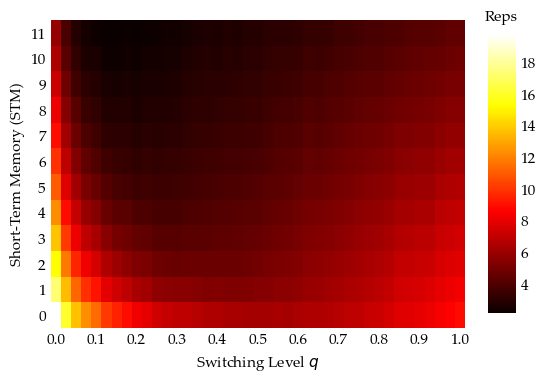

In [58]:
dataf1=pd.read_csv("dataf.csv")
# Pivot the dataframe to create a matrix suitable for imshow
data_pivot = dataf1.pivot(index='wm', columns='q', values='rep_efec')

# Convert the pivoted dataframe to a numpy array
matrix = data_pivot.values

# Plot using imshow
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11

fig, ax = plt.subplots(figsize=(6,4))
plt.imshow(matrix, aspect='auto', cmap='hot', origin='lower')
cbar = plt.colorbar(aspect=10,fraction=0.06)
cbar.set_label('', labelpad=10, fontsize=12, loc='top')
cbar.ax.set_title('Reps', fontsize=11, pad=10)
ticksbar = [5,10,15]

plt.xlabel('Switching Level $q$')
plt.ylabel('Short-Term Memory (STM)')
#ax.yaxis.set_major_locator(MaxNLocator(nbins=12))
plt.xticks(np.arange(len(data_pivot.columns)), data_pivot.columns)
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.yticks(np.arange(len(data_pivot.index)), data_pivot.index)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# Ocultar las líneas de los ticks en la barra de color
cbar.ax.tick_params(length=0)

# Quitar el recuadro de la barra de color
cbar.outline.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig("matshortemmemory.pdf")

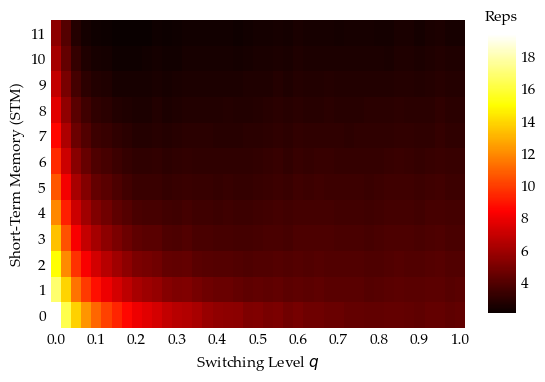

In [59]:
dataf2=pd.read_csv("dataiq.csv")
# Pivot the dataframe to create a matrix suitable for imshow
data_pivot2 = dataf2.pivot(index='wm', columns='q', values='rep_efec')

# Convert the pivoted dataframe to a numpy array
matrix2 = data_pivot2.values

# Plot using imshow
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11

fig, ax = plt.subplots(figsize=(6,4))
plt.imshow(matrix2, aspect='auto', cmap='hot', origin='lower')
cbar = plt.colorbar(aspect=10,fraction=0.06)
cbar.set_label('', labelpad=10, fontsize=12, loc='top')
cbar.ax.set_title('Reps', fontsize=11, pad=10)


plt.xlabel('Switching Level $q$')
plt.ylabel('Short-Term Memory (STM)')
#ax.yaxis.set_major_locator(MaxNLocator(nbins=12))
plt.xticks(np.arange(len(data_pivot2.columns)), data_pivot2.columns)
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.yticks(np.arange(len(data_pivot2.index)), data_pivot2.index)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# Ocultar las líneas de los ticks en la barra de color
cbar.ax.tick_params(length=0)

# Quitar el recuadro de la barra de color
cbar.outline.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig("matiquald.pdf")

In [60]:
z3=z-z2
y2=np.array(y2)
x2=np.array(x2)
z3=np.array(z3)
data3={'Wm':y2,'q':x2,'val':z3}
data3=pd.DataFrame(data3)
data3

NameError: name 'z' is not defined

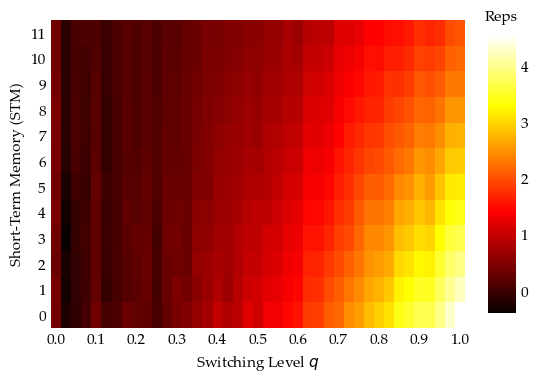

In [ ]:
# Pivot the dataframe to create a matrix suitable for imshow
data_pivot3 = data3.pivot(index='Wm', columns='q', values='val')

# Convert the pivoted dataframe to a numpy array
matrix3 = data_pivot3.values

# Plot using imshow
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11

fig, ax = plt.subplots(figsize=(6,4))
plt.imshow(matrix3, aspect='auto', cmap='hot', origin='lower')
cbar = plt.colorbar(aspect=10,fraction=0.06)
cbar.set_label('', labelpad=10, fontsize=11, loc='top')
cbar.ax.set_title('Reps', fontsize=11, pad=10)


plt.xlabel('Switching Level $q$')
plt.ylabel('Short-Term Memory (STM)')
#ax.yaxis.set_major_locator(MaxNLocator(nbins=12))
plt.xticks(np.arange(len(data_pivot3.columns)), data_pivot3.columns)
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.yticks(np.arange(len(data_pivot3.index)), data_pivot3.index)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# Ocultar las líneas de los ticks en la barra de color
cbar.ax.tick_params(length=0)

# Quitar el recuadro de la barra de color
cbar.outline.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig("matdiferences.pdf")

In [ ]:
prov1f=pd.read_csv("prov1f.csv",header=None)
prov1iq=pd.read_csv("prov1iq.csv",header=None)
for i in range(0,41):
    xf=prov1f.iloc[:,i].values
    globals()[f"xf{i}"]=xf
    
for i in range(0,41):
    xiq=prov1iq.iloc[:,i].values
    globals()[f"xiq{i}"]=xiq

In [ ]:
import statistics
mediasf=[]
mediasiq=[]
for i in range(0,41):
    xf=globals()[f"xf{i}"]
    xiq=globals()[f"xiq{i}"]
    mediaf=statistics.mean(xf)
    mediaiq=statistics.mean(xiq)
    mediasf.append(mediaf)
    mediasiq.append(mediaiq)
mediasiq=np.array(mediasiq)
mediasf=np.array(mediasf)


errorsf=[]
errorsiq=[]
for i in range(0,41):
    xf=globals()[f"xf{i}"]
    xiq=globals()[f"xiq{i}"]
    erroriq=np.std(xiq,dtype=np.float64) / np.sqrt(len(xiq))
    errorf=np.std(xf,dtype=np.float64) / np.sqrt(len(xf))
    errorsf.append(errorf)
    errorsiq.append(erroriq)
errorsiq=np.array(errorsiq)
errorsf=np.array(errorsf)
#--------------------------------------------------------------------------------------------
Q=[0]
q=0
rango = 1 / 40
for i in range(1,41):
    q+=rango
    Q.append(q)
from scipy.interpolate import interp1d

x_smooth = np.linspace(0, 1, 300)
f = interp1d(Q, mediasf, kind='cubic')
y_smooth = f(x_smooth)
f_std_error = interp1d(Q, errorsf, kind='cubic')
std_error_smooth = f_std_error(x_smooth)

f2 = interp1d(Q, mediasiq, kind='cubic')
y_smooth2 = f2(x_smooth)
f_std_error2 = interp1d(Q, errorsiq, kind='cubic')
std_error_smooth2 = f_std_error2(x_smooth)
#--------------------------------------------------------------------------------------------

In [ ]:
from scipy.interpolate import interp1d

x_smooth = np.linspace(0, 1, 300)
f = interp1d(Q, mediasf, kind='cubic')
y_smooth = f(x_smooth)
f_std_error = interp1d(Q, errorsf, kind='cubic')
std_error_smooth = f_std_error(x_smooth)

f2 = interp1d(Q, mediasiq, kind='cubic')
y_smooth2 = f2(x_smooth)
f_std_error2 = interp1d(Q, errorsiq, kind='cubic')
std_error_smooth2 = f_std_error2(x_smooth)



#initializing figure
fig=go.Figure()
# inserting traces in the plot 
#----------------------------------------------------------------------------------------------------------------------------------------------

#add Points
fig.add_trace(go.Scatter(x=Q,y=mediasf,mode='lines+markers',marker=dict(symbol='circle',size=4,color="#000000"), name='$\\text{SRW-f}$'))
fig.add_trace(go.Scatter(x=Q,y=mediasiq,mode='lines+markers',marker=dict(symbol='circle',size=4,color="#FF0000"), name='$\\text{ECN SRW}\,=$'))

fig.add_trace(go.Scatter(
    x=np.concatenate([Q, Q[::-1]]),
    y=np.concatenate([mediasf - errorsf, (mediasf + errorsf)[::-1]]),
    fill='toself',
    fillcolor="rgba(133,133,133,0.09)",
    line=dict(color="rgba(133,133,133,0)")
))

fig.add_trace(go.Scatter(
    x=np.concatenate([Q, Q[::-1]]),
    y=np.concatenate([mediasiq - errorsiq, (mediasiq + errorsiq)[::-1]]),
    fill='toself',
    fillcolor='rgba(255,200,200,0.3)',
    line=dict(color='rgba(255,200,200,0)')
))

fig.update_traces(line=dict(dash='dot',width=0.5))
#------------------------------------------------------------------------------------------------------------

'''Layouts'''
#legend layout
fig.update_layout(legend=dict(xref='paper',x=0.8,y=0.9),
                  plot_bgcolor='#ffffff',margin=dict(l=50, r=50, b=50, t=50),template='simple_white')


#Layout of x-Axe
fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\text{Switching Level}\, q$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.1,nticks=8,ticks='inside'),
                mirror='ticks',nticks=6
                            )
#Layout of y-Axe
fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='Number of Repetitions',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=1,nticks=8,ticks='inside'),
                mirror='ticks',nticks=6)

write_image(fig,'repvsq.pdf',format='pdf')
fig.show()

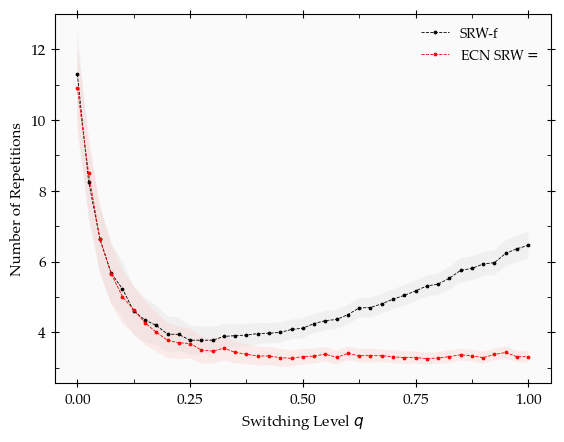

In [ ]:

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Palatino Linotype']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['axes.labelsize'] = 11
fig,ax=plt.subplots()
plt.plot(Q,mediasf,c="#000000",marker=".",linestyle='--',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"SRW-f",alpha=1)
plt.plot(Q,mediasiq,c="#FF0000",marker=".",linestyle='--',linewidth=0.6,markeredgewidth=0.7,markersize=4,label=r"ECN SRW$=$",alpha=1)
plt.fill_between(Q, mediasf - errorsf, mediasf + errorsf, color='#858585', alpha=0.08,edgecolor=None)
plt.fill_between(Q, mediasiq - errorsiq, mediasiq + errorsiq, color='#FFC8C8', alpha=0.3,edgecolor=None)
legenda1=plt.legend()
legenda1=ax.legend(prop={'size': 10})
legenda1.get_frame().set_facecolor('#FAFAFA')  # Color de fondo del recuadro
legenda1.get_frame().set_edgecolor('#FAFAFA')   

plt.ylabel("Number of Repetitions")
plt.xlabel("Switching Level $q$")
ax.tick_params(which='major', direction='inout',length=6, top=True, right=True)
ax.tick_params(which='minor', direction='in',length=3, top=True, right=True)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_facecolor('#FAFAFA')
plt.savefig("matrepetionesq.pdf")